In [123]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### 1. Data:
The data of insurers from 5 states in North America — Washington, California, Arizona, Nevada, and Oregon. The data consists of 8 continuous variables and 15 categorical variables which are one-hot encoded for applying ML models. Among the variables, Customer (unique identifier) and Effective To Date are discarded as they are irrelevant to our analysis


In [124]:
df = pd.read_csv('data.csv')
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4          3/2/2011         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

#### 1.1 Data Cleaning and Pre processing

In [125]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [126]:
# Checks for any duplicate records in the data frame
df.duplicated().sum()

# Check for the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

The dataset did not have any missing values or duplicate records as both operations returned zero. Also, we ensured that the data types of the columns are consistent with the data in them.

Date formatting of Effective to Date Column

In [127]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'], dayfirst=True, errors='coerce') #convert to unix

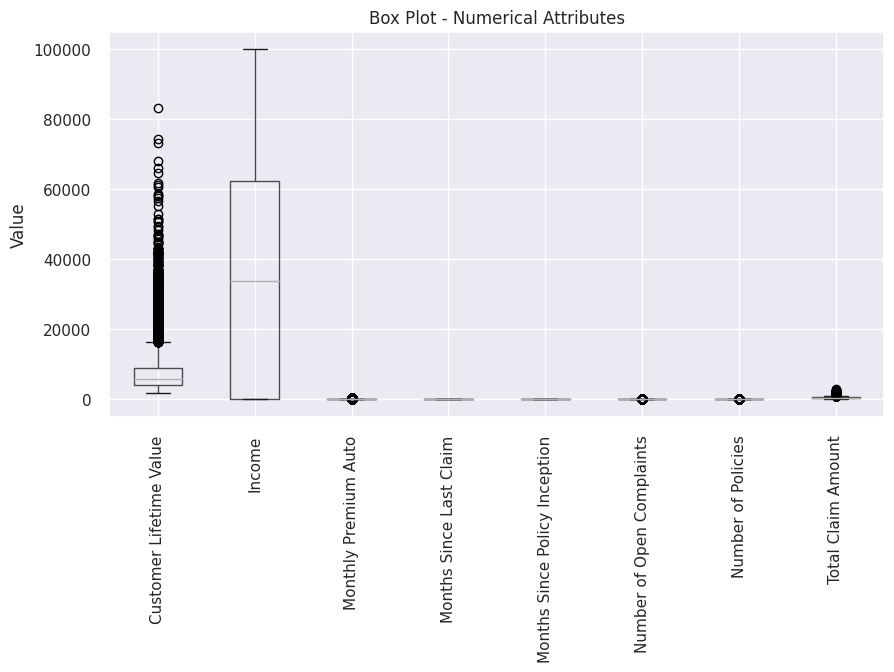

In [128]:
# Define numerical columns
numCol = df.select_dtypes(include=['int64', 'float64']).columns

# Box plot
df[numCol].boxplot()
plt.title('Box Plot - Numerical Attributes')
plt.xticks(rotation=90)
plt.ylabel('Value')
plt.show()

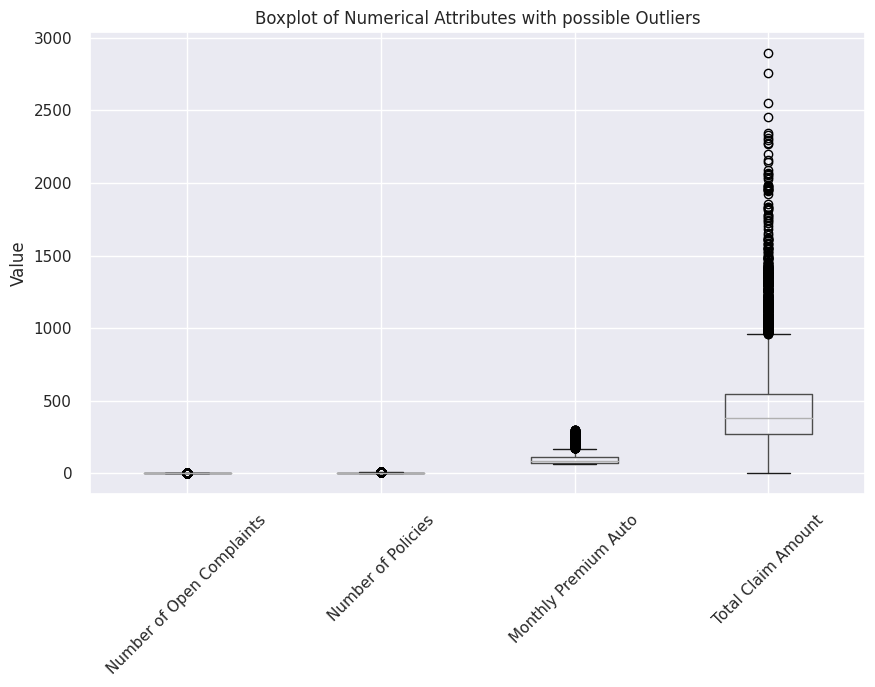

In [129]:
outlier_col = [ 'Number of Open Complaints', 'Number of Policies','Monthly Premium Auto', 'Total Claim Amount']
plt.figure(figsize=(10, 6))
df[outlier_col].boxplot()
plt.title('Boxplot of Numerical Attributes with possible Outliers')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.show()

In [130]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

### 2. EDA

In [131]:
df_categorical = df.select_dtypes(include=['object'])
df_numerical =  df.select_dtypes(include=['number'])

In [132]:
df_categorical['State'].value_counts()

State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

In [133]:
temp = df_categorical[df_categorical['Response']=='Yes']
temp.groupby('State')['Response'].count()

State
Arizona       243
California    456
Nevada        124
Oregon        376
Washington    109
Name: Response, dtype: int64

In [134]:
df_numerical.describe().T

count          mean           std  \
Customer Lifetime Value        9134.0   8004.940475   6870.967608   
Income                         9134.0  37657.380009  30379.904734   
Monthly Premium Auto           9134.0     93.219291     34.407967   
Months Since Last Claim        9134.0     15.097000     10.073257   
Months Since Policy Inception  9134.0     48.064594     27.905991   
Number of Open Complaints      9134.0      0.384388      0.910384   
Number of Policies             9134.0      2.966170      2.390182   
Total Claim Amount             9134.0    434.088794    290.500092   

                                       min          25%           50%  \
Customer Lifetime Value        1898.007675  3994.251794   5780.182197   
Income                            0.000000     0.000000  33889.500000   
Monthly Premium Auto             61.000000    68.000000     83.000000   
Months Since Last Claim           0.000000     6.000000     14.000000   
Months Since Policy Inception     0.000000    24.000000     48.000000   
Number of Open Complaints         0.000000     0.000000      0.000000   
Number of Policies                1.000000     1.000000      2.000000   
Total Claim Amount                0.099007   272.258244    383.945434   

                                        75%           max  
Customer Lifetime Value         8962.167041  83325.381190  
Income                         62320.000000  99981.000000  
Monthly Premium Auto             109.000000    298.000000  
Months Since Last Claim           23.000000     35.000000  
Months Since Policy Inception     71.000000     99.000000  
Number of Open Complaints          0.000000      5.000000  
Number of Policies                 4.000000      9.000000  
Total Claim Amount               547.514839   2893.239678

In [135]:
corr_coef, p = stats.pearsonr(df['Monthly Premium Auto'],df['Total Claim Amount'])
print("Pearson Coefficient: ", corr_coef, "p-value", p)

Pearson Coefficient:  0.6320166625194119 p-value 0.0


<Axes: >

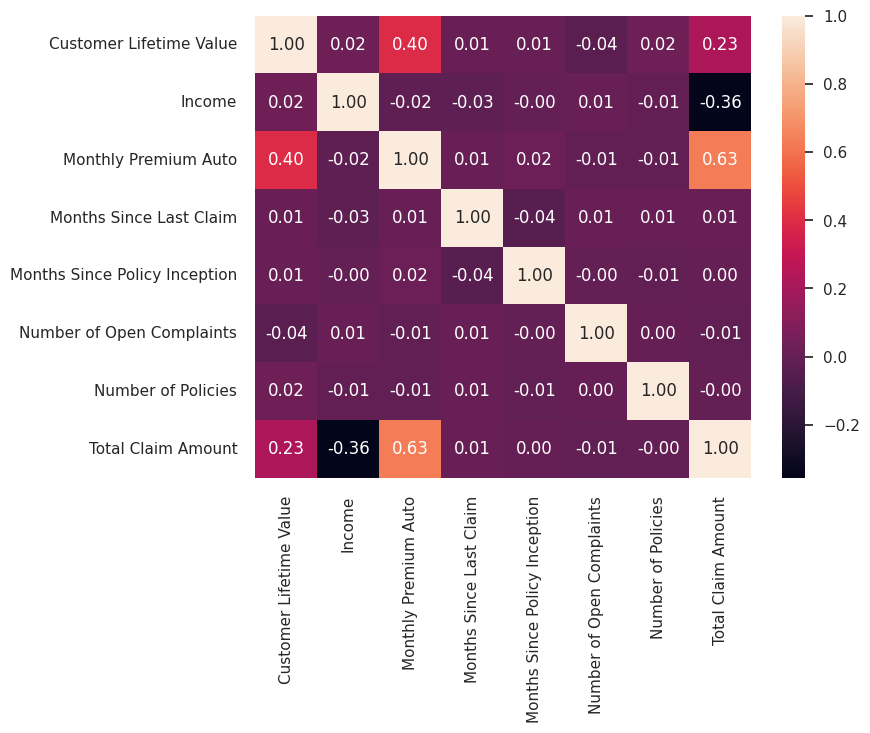

In [136]:
corr_matrix = df_numerical.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f')

<Axes: >

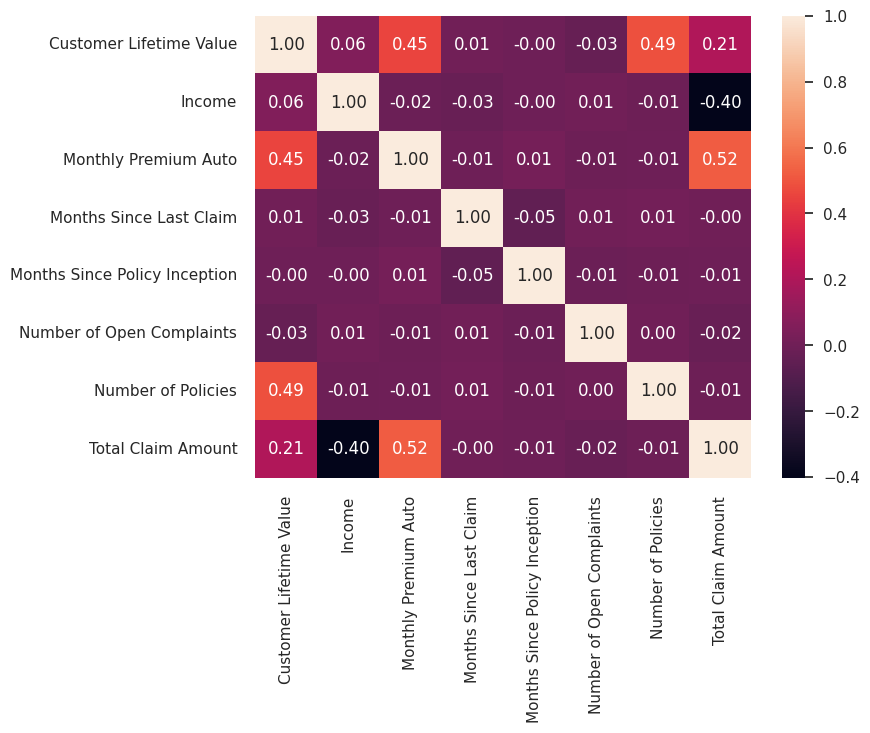

In [137]:
spearm_corr_matrix = df_numerical.corr(method = 'spearman')
plt.figure(figsize = (8,6))
sns.heatmap(spearm_corr_matrix, annot = True, fmt = '.2f')

In [138]:
corr_coef_sp, p_sp = stats.spearmanr(df['Monthly Premium Auto'],df['Total Claim Amount'])
print("Spearman Coefficient: ", corr_coef_sp, "p-value", p_sp)

Spearman Coefficient:  0.5222612335718811 p-value 0.0


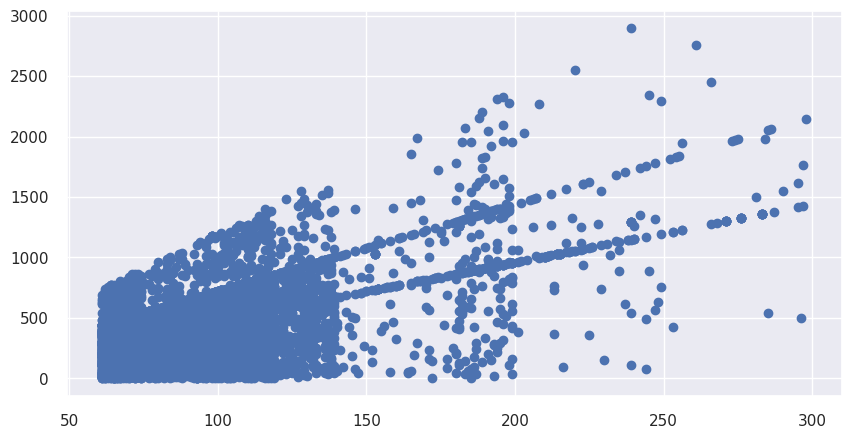

In [139]:
plt.scatter(df['Monthly Premium Auto'],df['Total Claim Amount'])

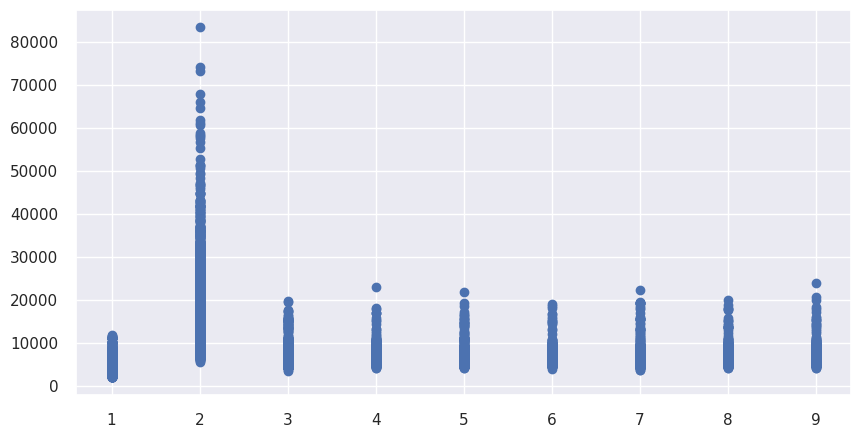

In [140]:
plt.scatter(df['Number of Policies'],df['Customer Lifetime Value']) #Why?

Number of Policies
1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: count, dtype: int64


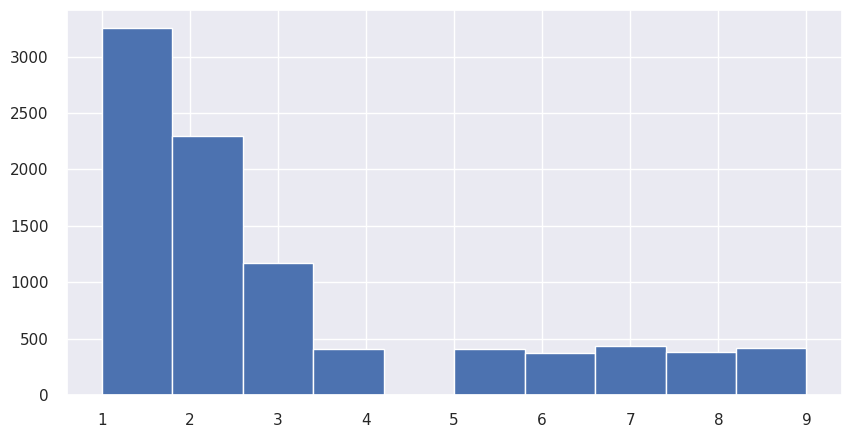

In [141]:
print(df['Number of Policies'].value_counts())
plt.hist(df['Number of Policies']);

### Probability Distribution

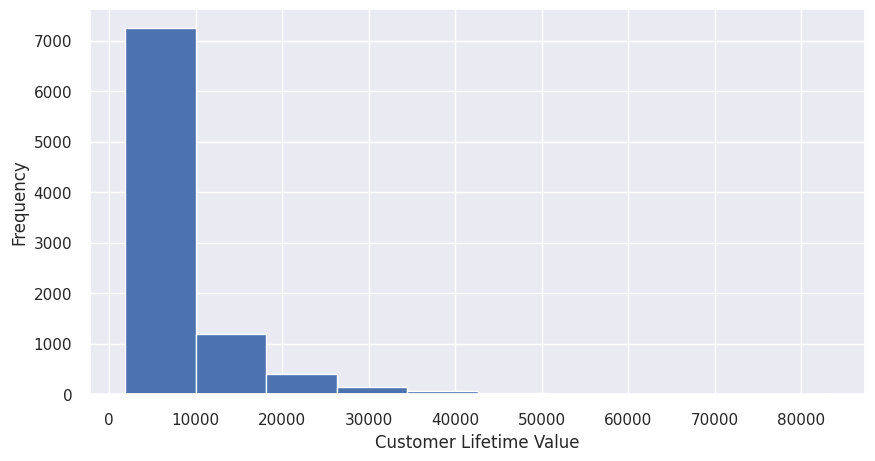

In [142]:
plt.hist(df['Customer Lifetime Value'])
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Frequency");

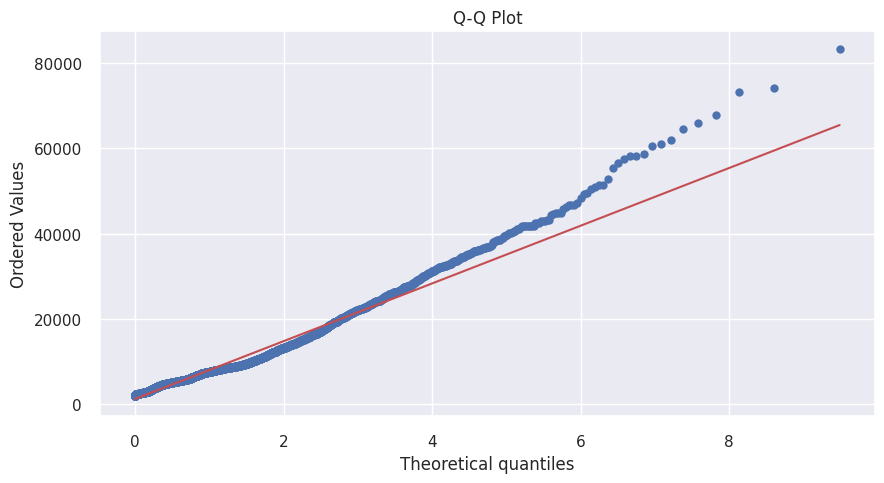

In [143]:
stats.probplot(df['Customer Lifetime Value'], plot = plt, dist='expon');
plt.title("Q-Q Plot");

####Hypothesis Testing:
Null Hypothesis : The data is Normally distibuted <br>
Alternate Hypothesis : the data is not normally distributed

In [144]:
import scipy.stats as stats
stats.shapiro(df['Customer Lifetime Value'])

ShapiroResult(statistic=0.7033725380897522, pvalue=0.0)

<b> Identifying the test </b>
*   ANOVA
*   TTEST/Manwhiteneyy

In [145]:
df_categorical.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [146]:
# Initialize lists to store column names for ANOVA and Mann-Whitney U test
columns_anova = []
columns_mannwhitney = []

# Iterate through categorical columns in the DataFrame
for column in df_categorical:
    # Check if the column has more than 2 unique values for ANOVA
    if df[column].nunique() > 2:
        columns_anova.append(column)
    # Otherwise, consider it for Mann-Whitney U test
    else:
        columns_mannwhitney.append(column)

# Print the lists of columns for ANOVA and Mann-Whitney U test
print("Columns for ANOVA test:", columns_anova)
print("Columns for Mann-Whitney U test:", columns_mannwhitney)

Columns for ANOVA test: ['Customer', 'State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']
Columns for Mann-Whitney U test: ['Response', 'Gender']


#### Target variable analysis

In [147]:
Target = df['Customer Lifetime Value']
Target.describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

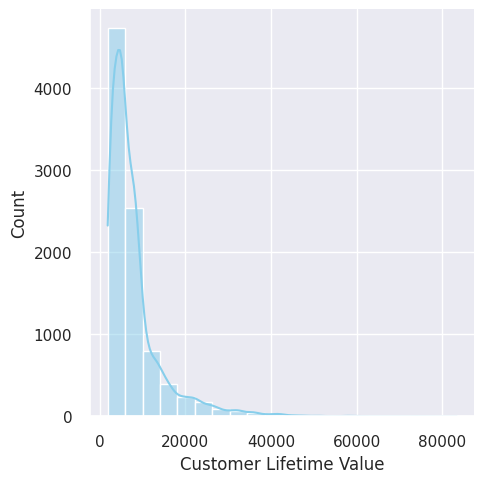

In [148]:
sns.displot(data=df, x="Customer Lifetime Value", kde=True, color="skyblue", bins=20)

<Axes: xlabel='Customer Lifetime Value'>

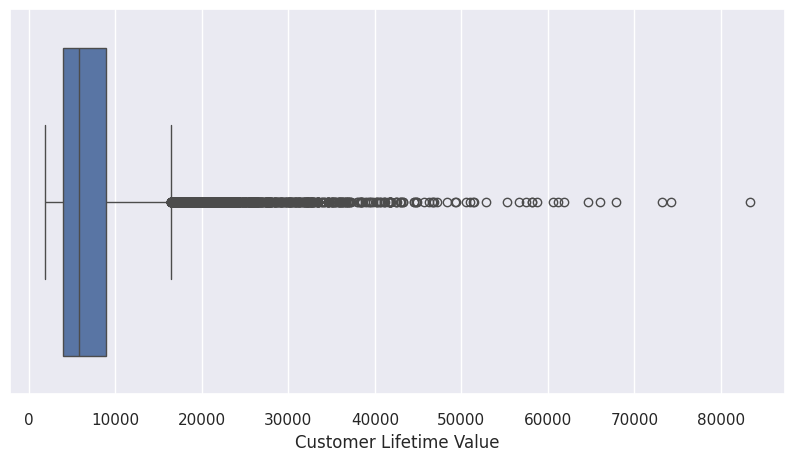

In [149]:
sns.boxplot(data= df, x="Customer Lifetime Value")

#### Numerical Feature Analysis

In [150]:
df_numerical.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [151]:
numerical_columns = ['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
           'Months Since Policy Inception', 'Number of Open Complaints',
           'Number of Policies', 'Total Claim Amount']
# Calculate statistics for each column
statistics = df[numerical_columns].agg(['mean', 'var', 'std', 'skew']).transpose()

# Print the statistics in a tabular format
print("Statistics for specified columns:")
print(statistics.to_string())

Statistics for specified columns:
                                       mean           var           std      skew
Income                         37657.380009  9.229386e+08  30379.904734  0.286887
Monthly Premium Auto              93.219291  1.183908e+03     34.407967  2.123546
Months Since Last Claim           15.097000  1.014705e+02     10.073257  0.278586
Months Since Policy Inception     48.064594  7.787443e+02     27.905991  0.040165
Number of Open Complaints          0.384388  8.287982e-01      0.910384  2.783263
Number of Policies                 2.966170  5.712969e+00      2.390182  1.253333
Total Claim Amount               434.088794  8.439030e+04    290.500092  1.714966


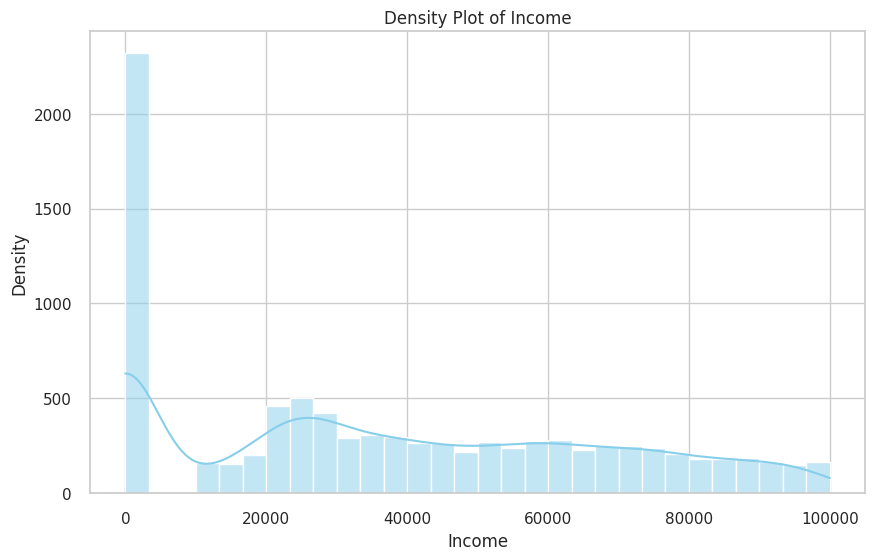

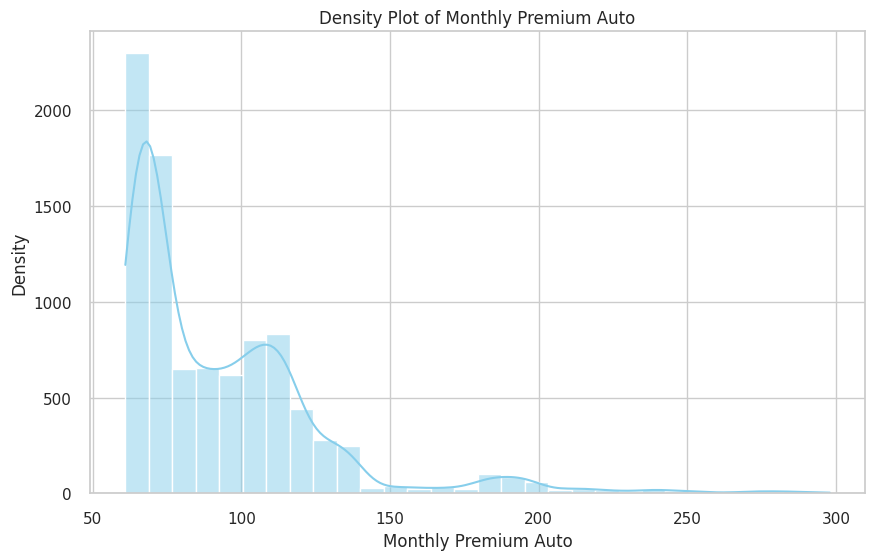

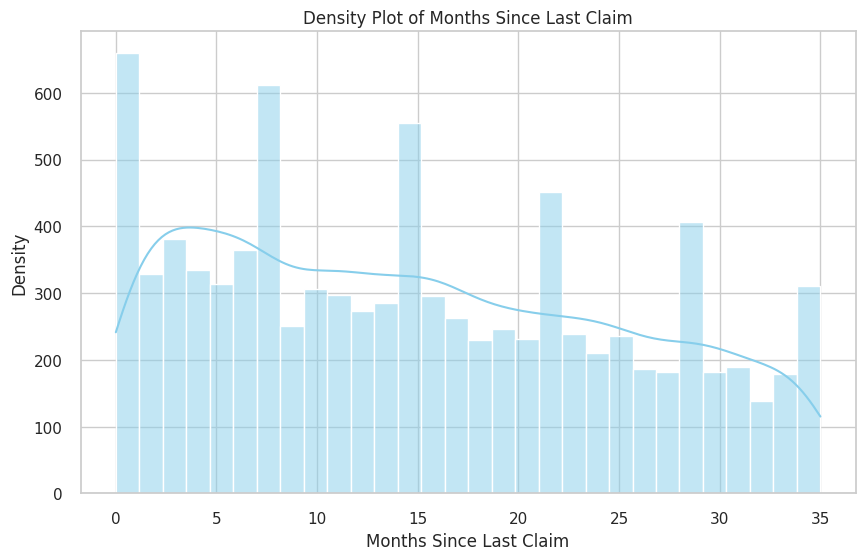

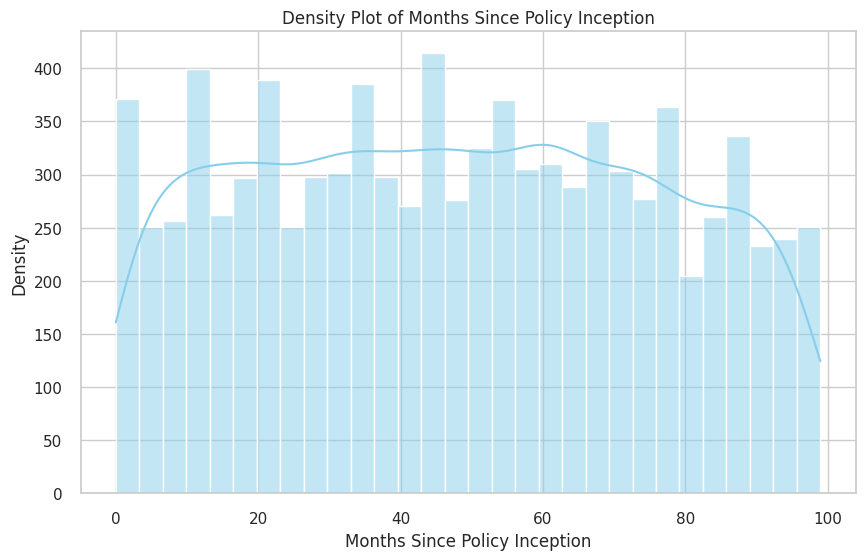

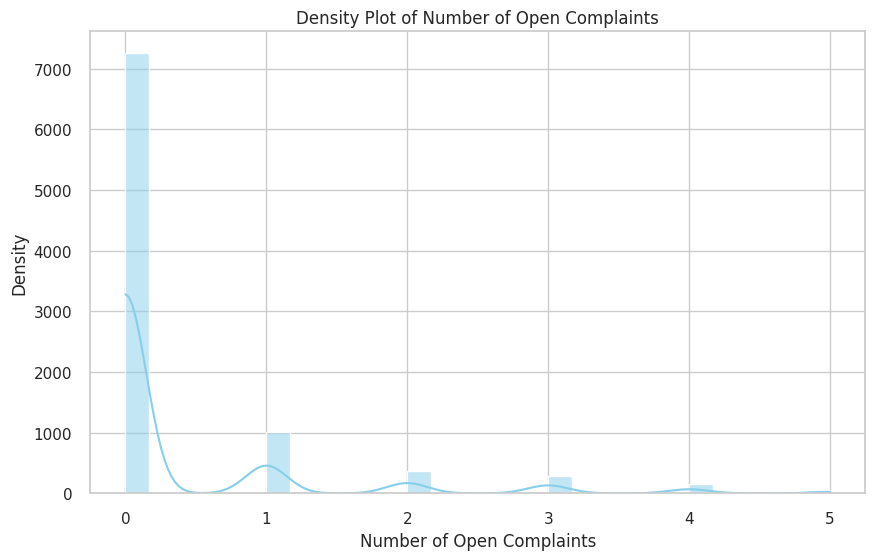

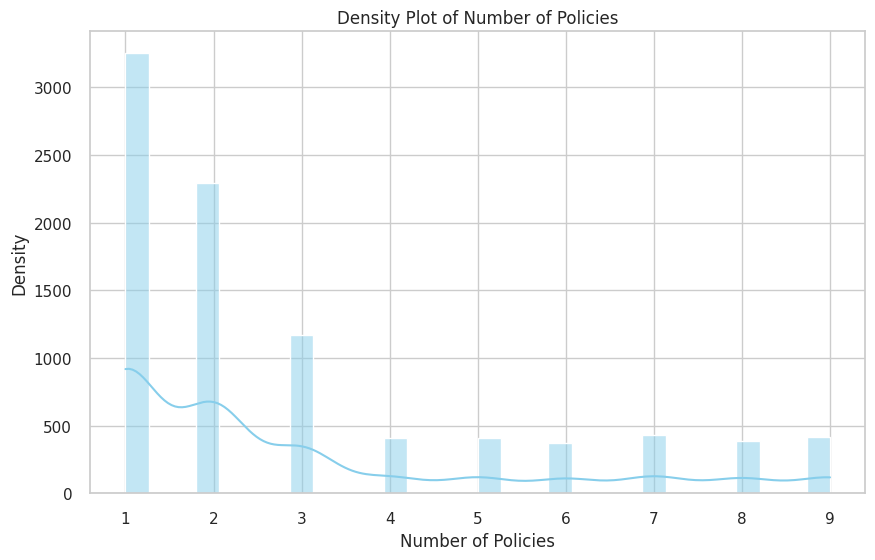

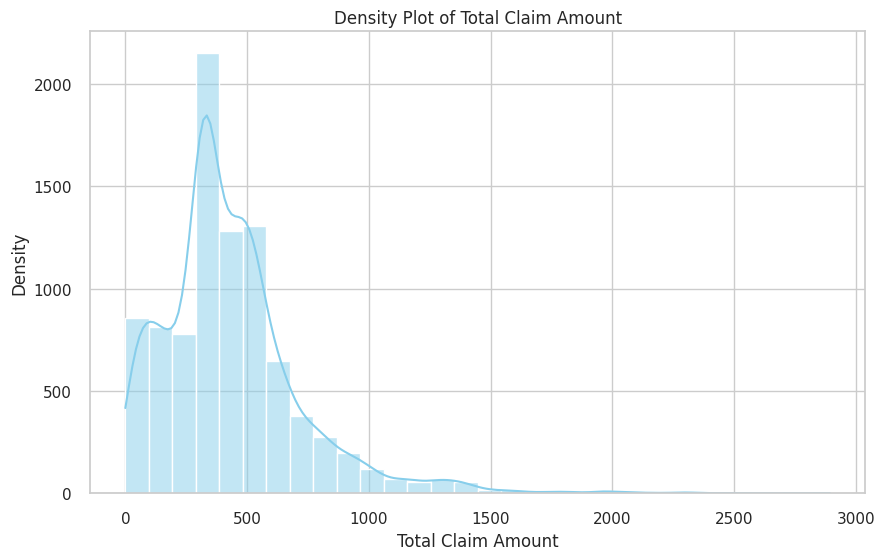

In [152]:
sns.set(style="whitegrid", palette="pastel")

# Iterate over each numerical column and create a density plot and histogram
for column in numerical_columns:
    plt.figure(figsize=(10, 6))

    # Density plot
    sns.histplot(df[column], kde=True, color='skyblue', bins=30)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

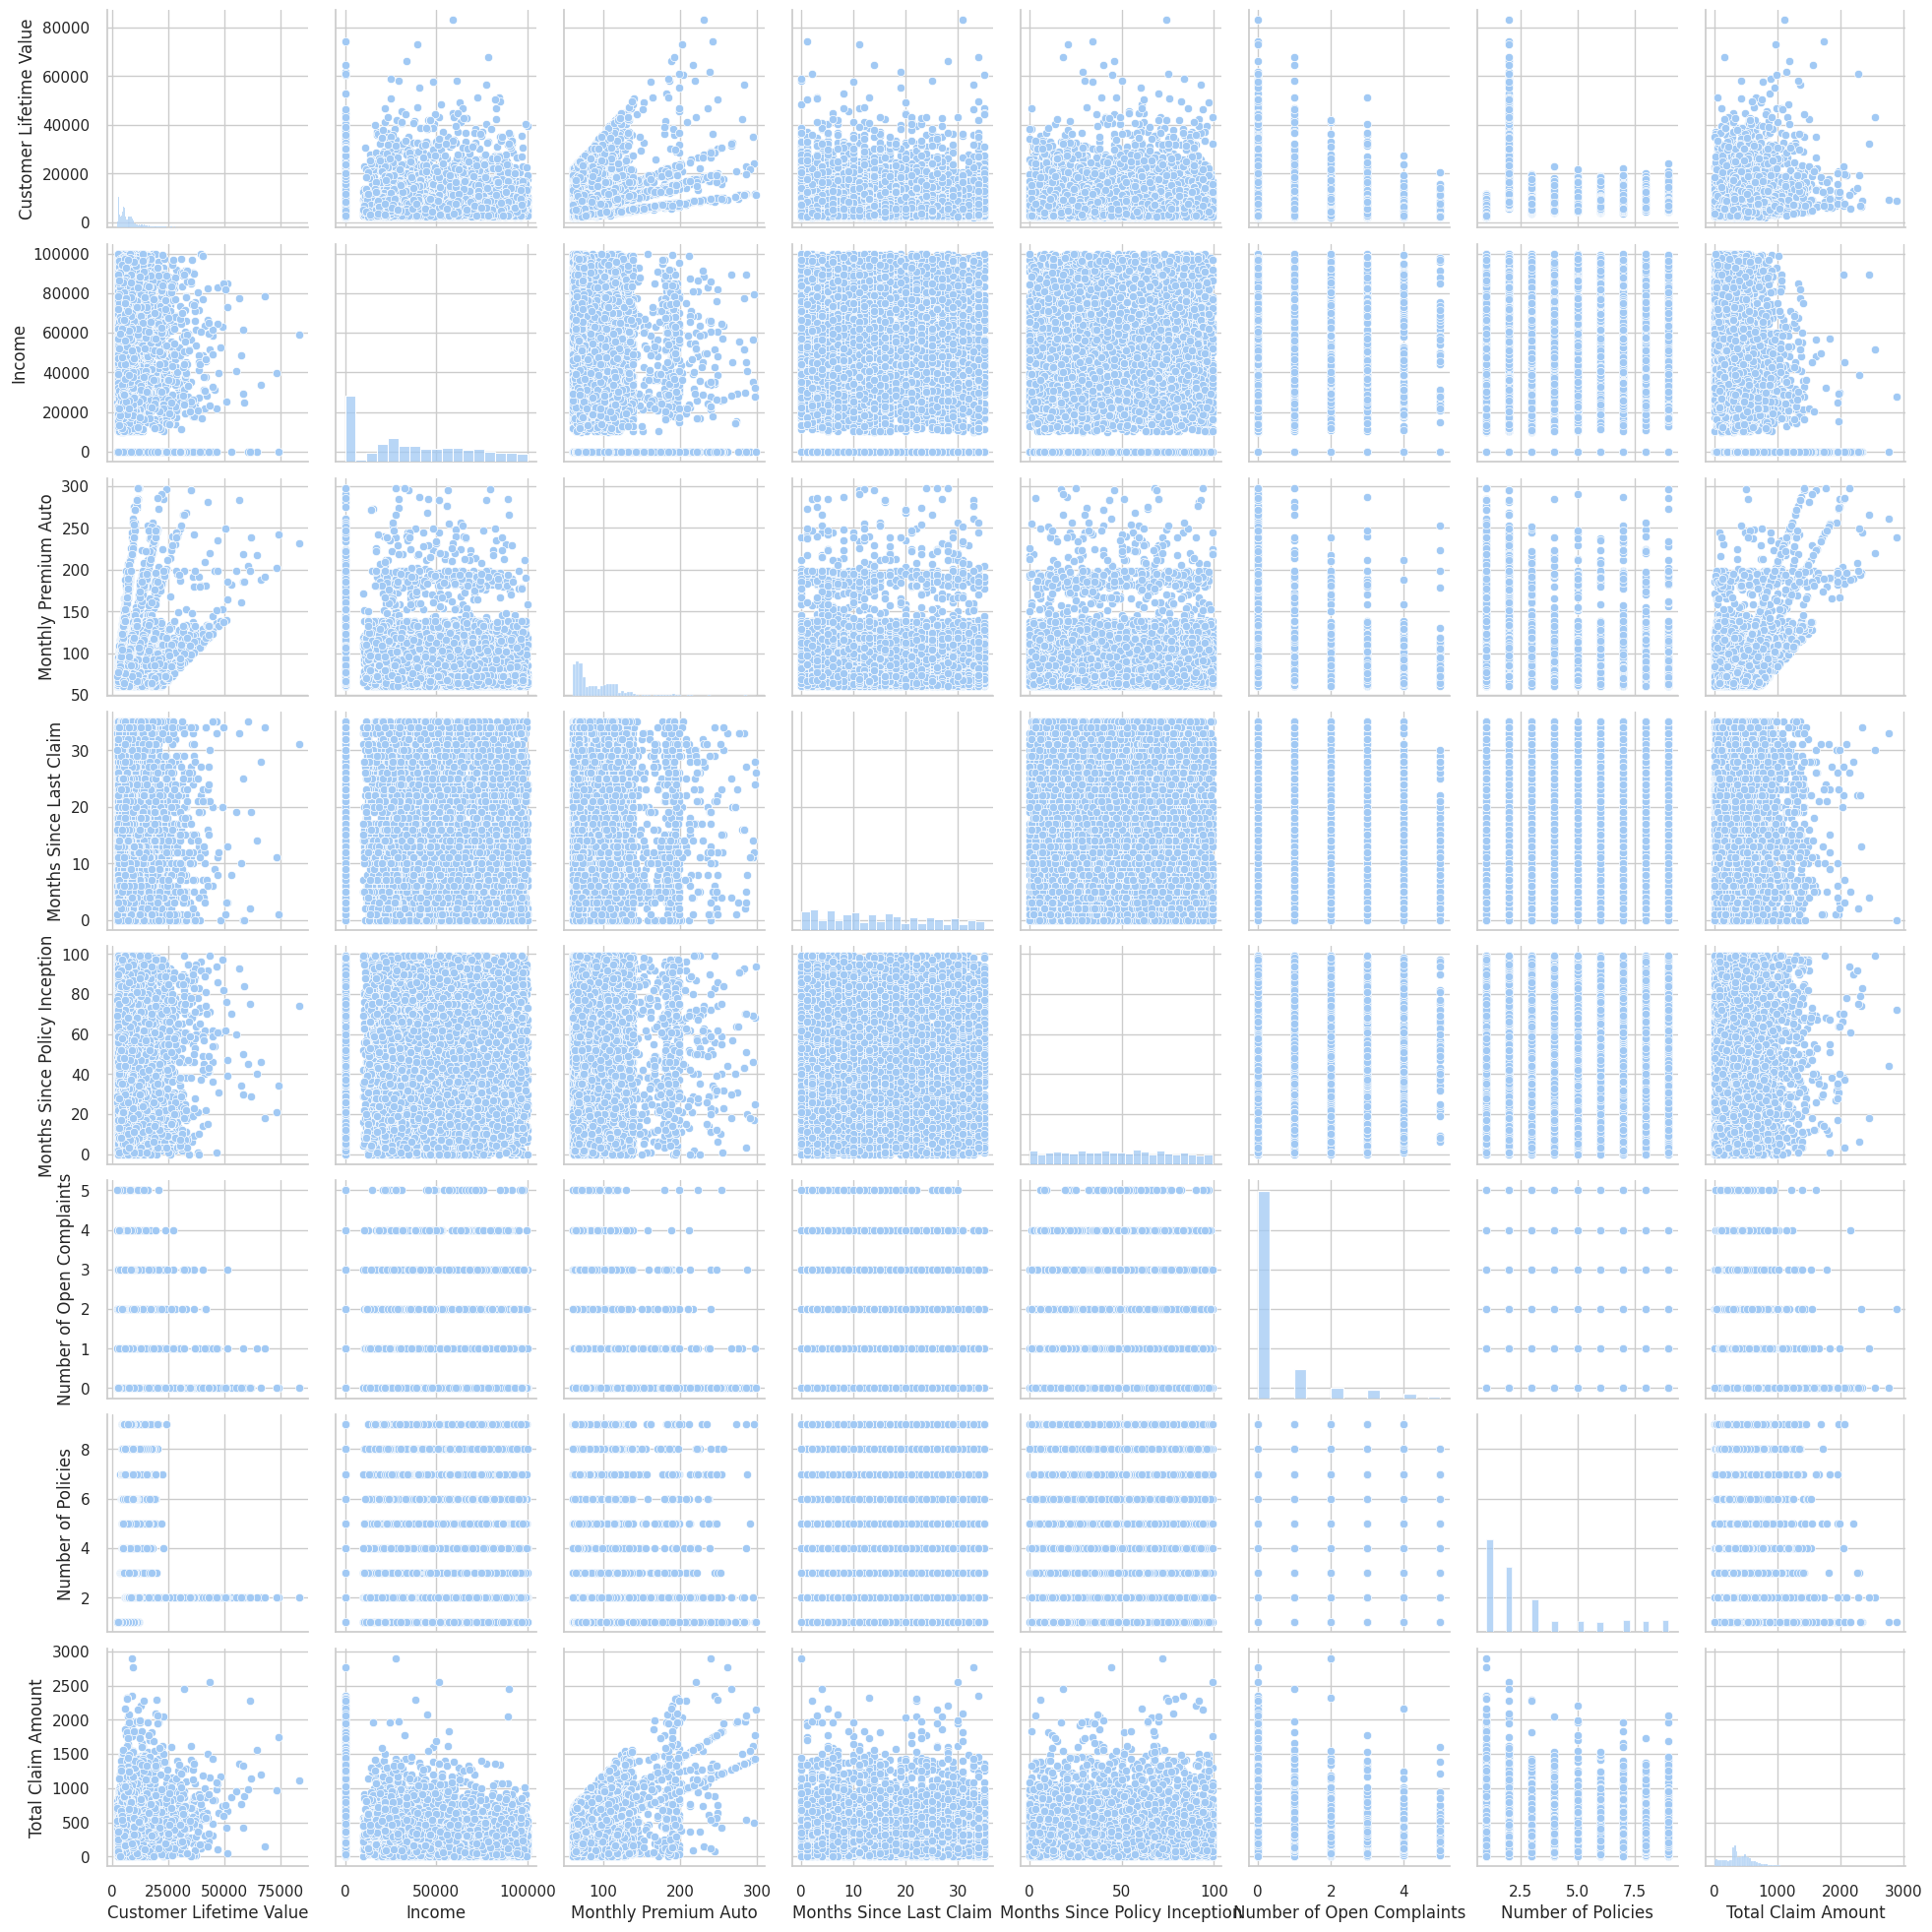

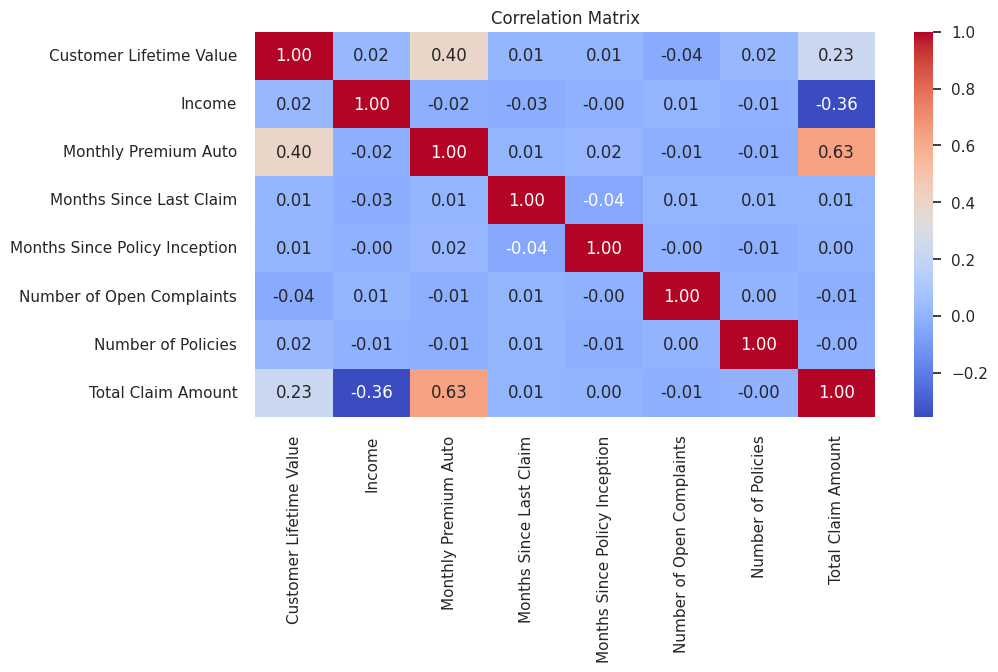

In [153]:
numerical = df.select_dtypes(include=['float64', 'int64']).columns

# Scatter plots for all pairs of numerical variables
sns.pairplot(df[numerical])
plt.show()

# Correlation matrix for all numerical columns
correlation_matrix = df[numerical].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [154]:
# Average months since last claim
avg_months_since_last_claim = df['Months Since Last Claim'].mean()
print(f"Average Months Since Last Claim: {avg_months_since_last_claim:.2f}")

Average Months Since Last Claim: 15.10


In [155]:
# Average months since policy inception
avg_months_since_policy_inception = df['Months Since Policy Inception'].mean()
print(f"Average Months Since Policy Inception: {avg_months_since_policy_inception:.2f}")


Average Months Since Policy Inception: 48.06


In [156]:
# Frequency of open complaints
open_complaints_frequency = df['Number of Open Complaints'].value_counts()
print("Frequency of Open Complaints:")
print(open_complaints_frequency)

Frequency of Open Complaints:
Number of Open Complaints
0    7252
1    1011
2     374
3     292
4     149
5      56
Name: count, dtype: int64


In [157]:
# Average number of policies per customer
avg_policies_per_customer = df['Number of Policies'].mean()
print(f"Average Number of Policies per Customer: {avg_policies_per_customer:.2f}")


Average Number of Policies per Customer: 2.97


In [158]:
# Highest number of policies

print("Number of Policies:\n",df['Number of Policies'].value_counts())

Number of Policies:
 Number of Policies
1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: count, dtype: int64


#### Categorical Feature Analysis

In [159]:
df_categorical.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [160]:
df_categorical_new = df_categorical.drop('Customer', axis=1)

In [161]:
for column in df_categorical_new.columns:
    num_unique_labels = df_categorical_new[column].nunique()
    print(f" '{column}': {num_unique_labels}")

 'State': 5
 'Response': 2
 'Coverage': 3
 'Education': 5
 'EmploymentStatus': 5
 'Gender': 2
 'Location Code': 3
 'Marital Status': 3
 'Policy Type': 3
 'Policy': 9
 'Renew Offer Type': 4
 'Sales Channel': 4
 'Vehicle Class': 6
 'Vehicle Size': 3


<Figure size 1200x800 with 0 Axes>

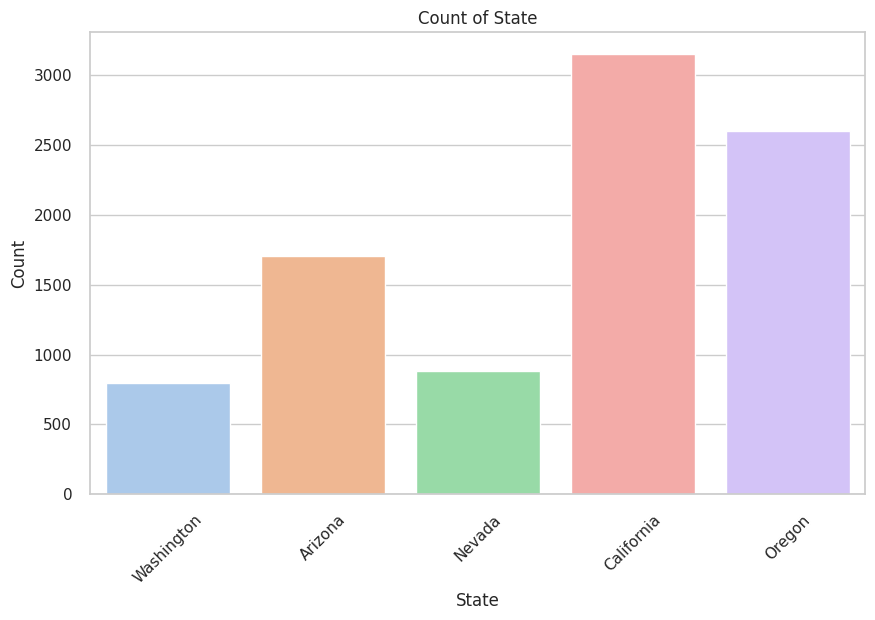

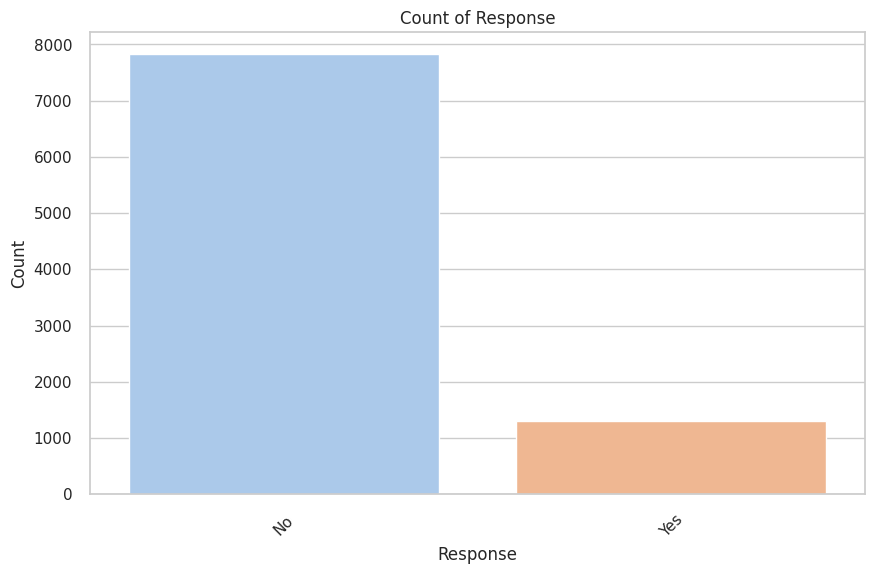

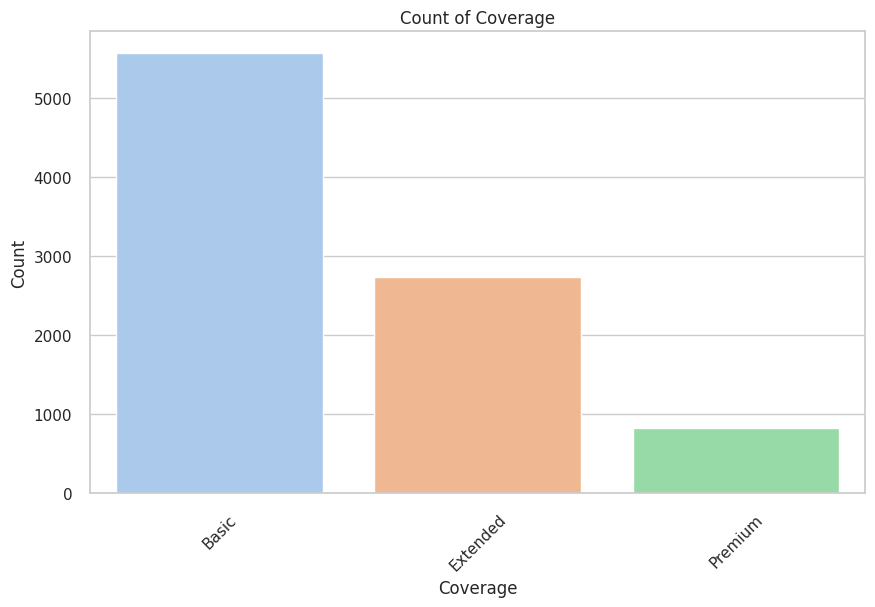

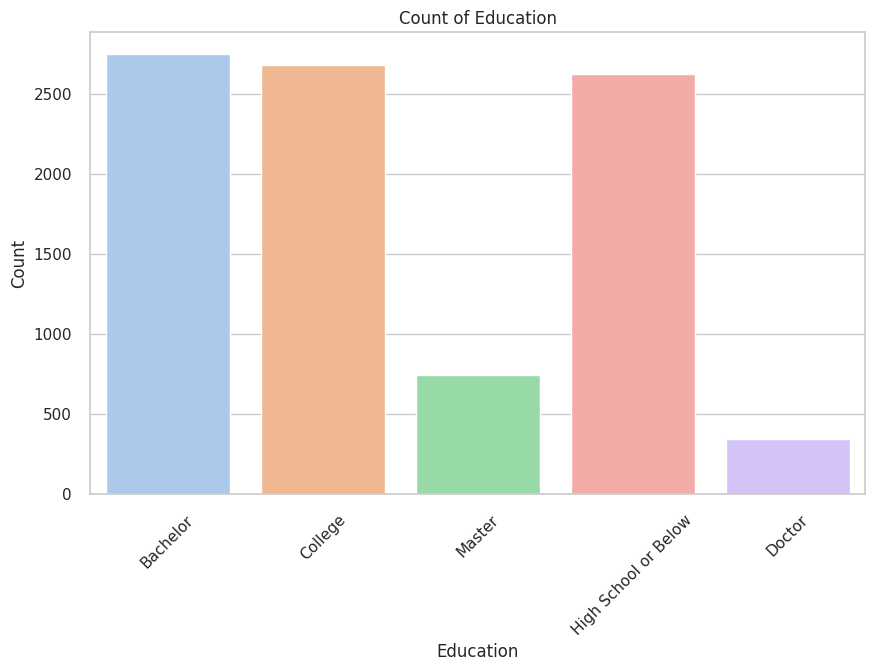

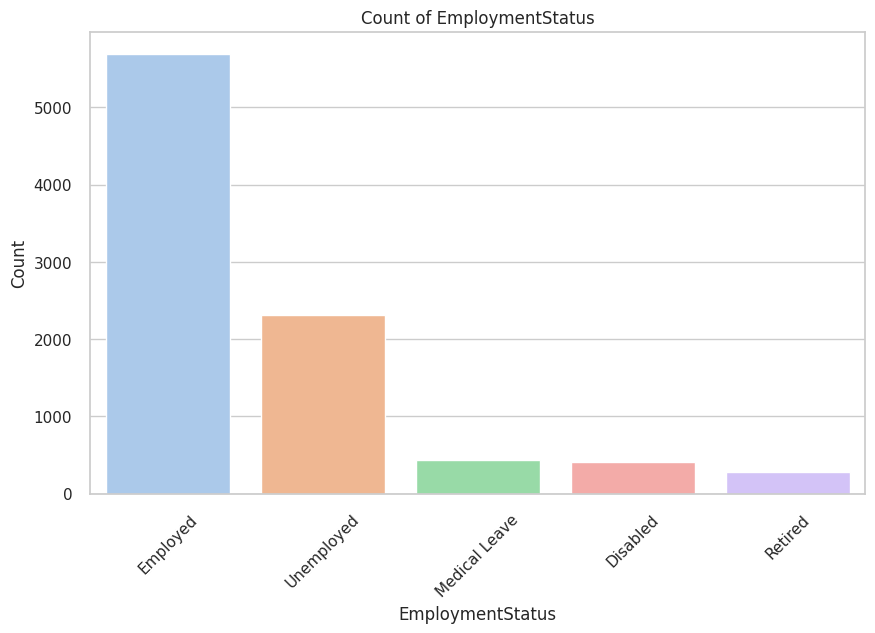

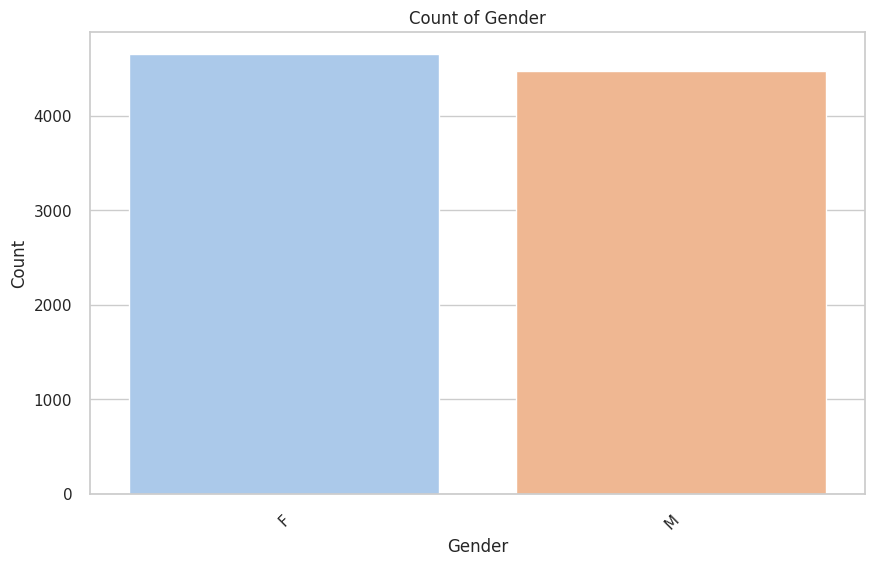

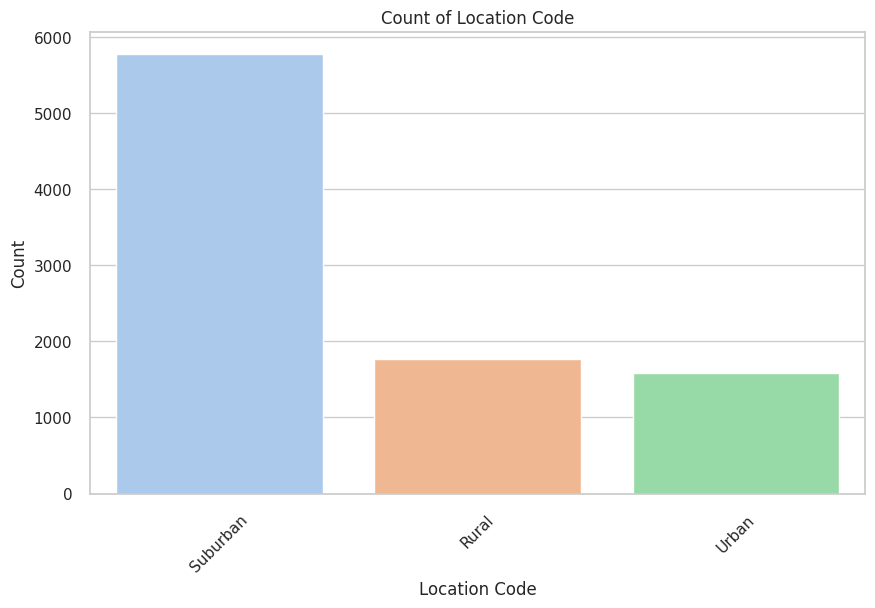

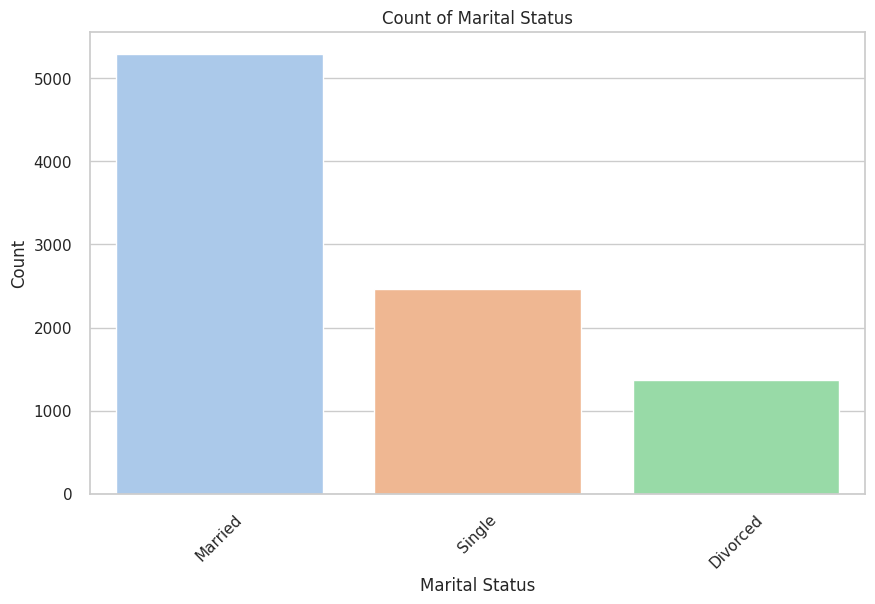

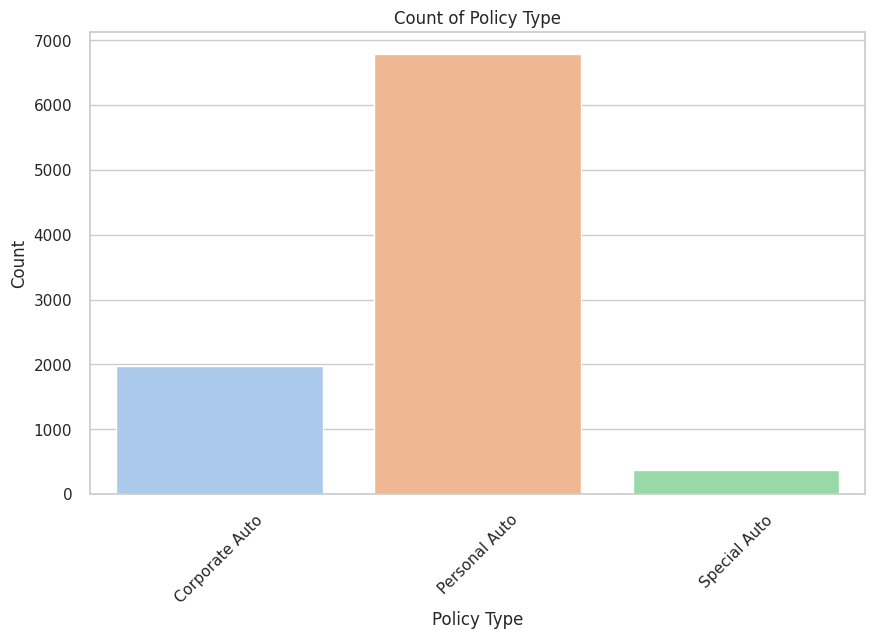

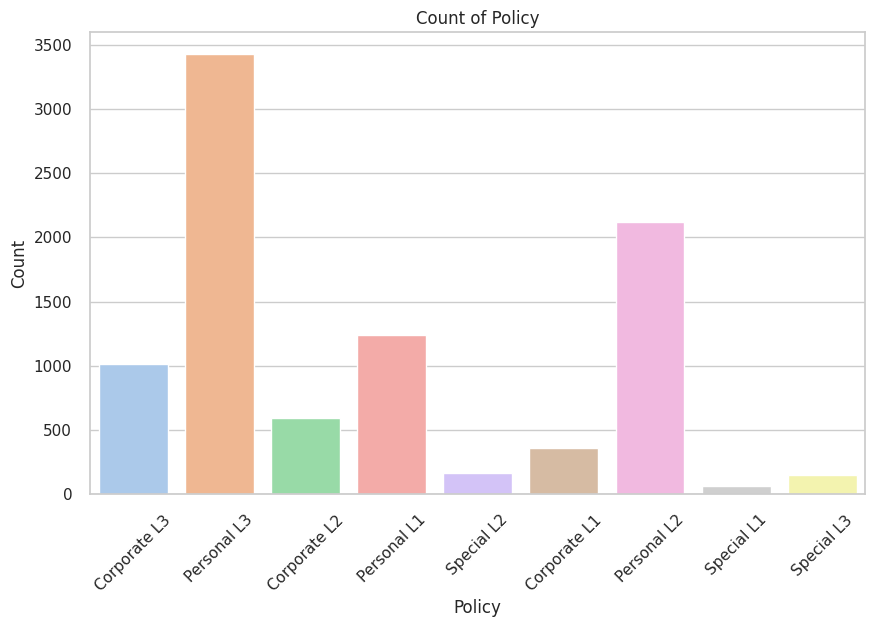

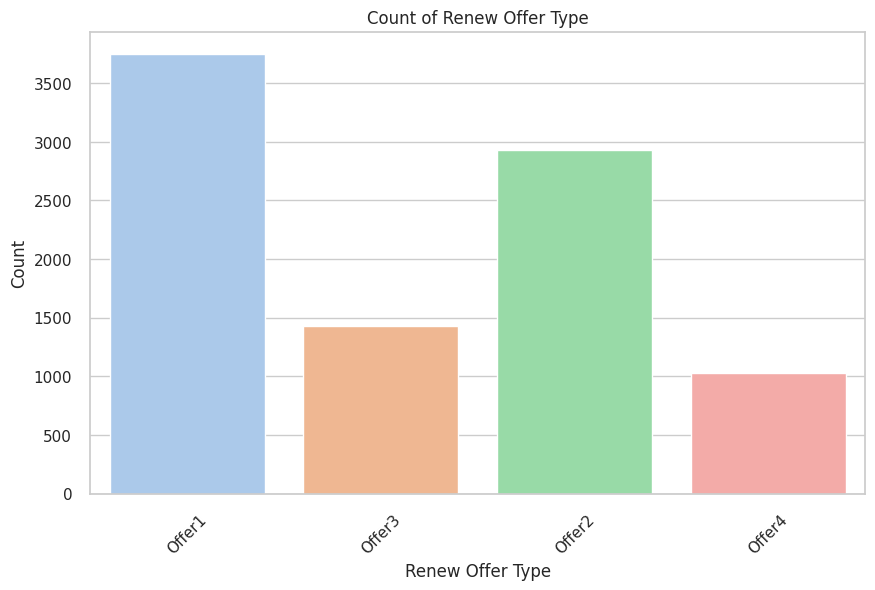

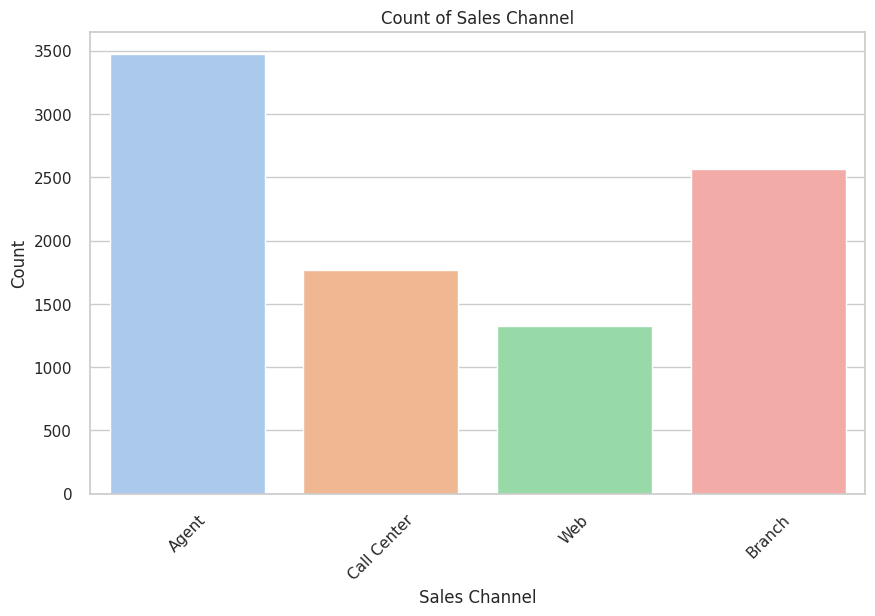

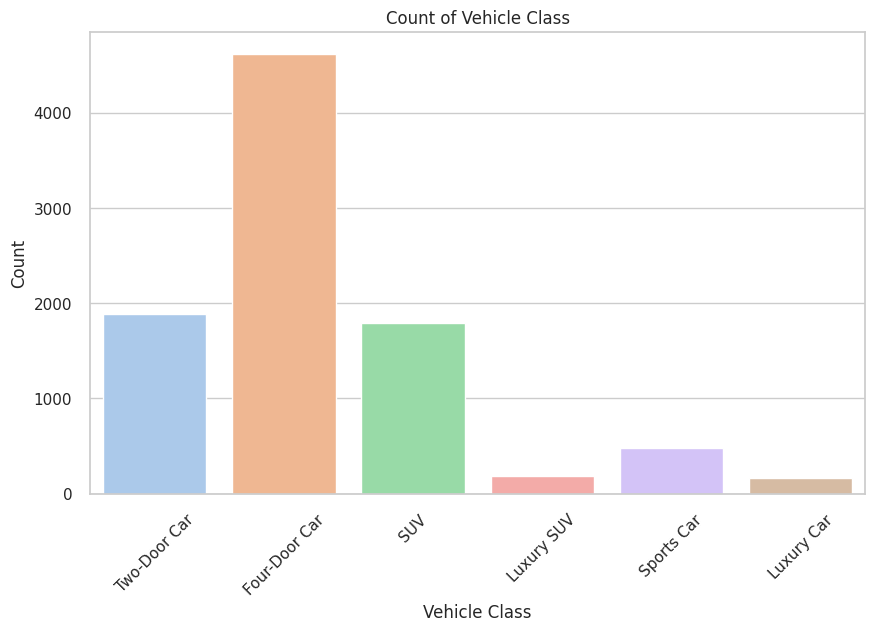

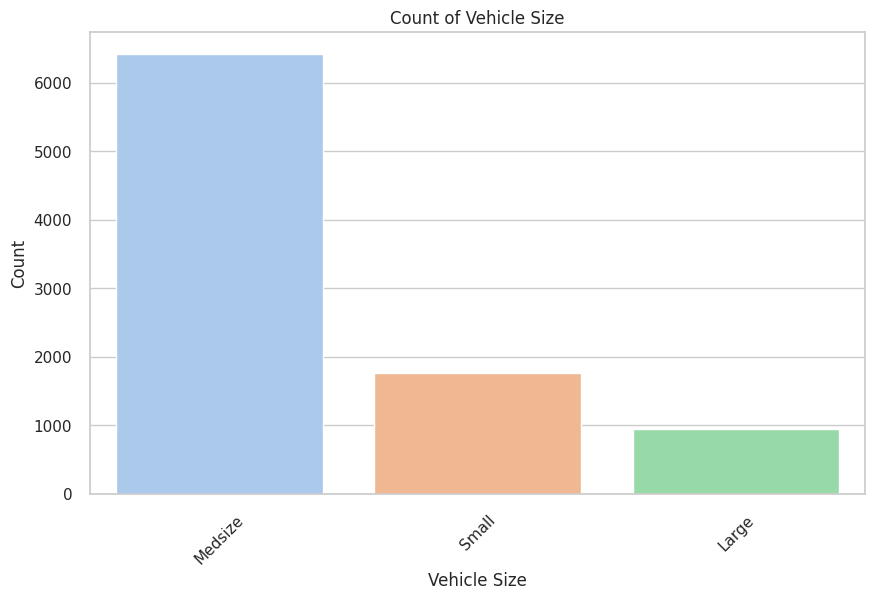

In [162]:
plt.figure(figsize=(12, 8))

# Iterate over each categorical column and create a bar plot
for column in df_categorical_new.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df_categorical_new, palette='pastel', hue = column)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

#### Feature Engineering
Binning the continuous variables

In [163]:
CLV_bins = [0,2000, 4000, 6000, 8000, 10000, 20000, 30000, 50000,90000]
value_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]

income_bins = [ -1,15000, 30000, 45000, 60000, 75000, 100000]
income_labels = [0,1,2,3,4,5]

premium_bins = [60, 70, 80, 100, 150, 200, 250, 300]
premium_labels = [0,1,2,3,4,5,6]

claim_bins = [0, 150, 300, 450, 600, 750, 1000, 1200, 1400, 1800, 3000]
claim_labels = [0,1,2,3,4,5,6,7,8,9]

# Apply binning to the respective variables
df['CLV Category'] = pd.cut(df['Customer Lifetime Value'], bins=CLV_bins, labels=value_labels)
df['Income Category'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)
df['Monthly Premium Category'] = pd.cut(df['Monthly Premium Auto'], bins=premium_bins, labels=premium_labels)
df['Total Claim Amount Category'] = pd.cut(df['Total Claim Amount'], bins=claim_bins, labels=claim_labels)

# Display the resulting DataFrame
print(df.head())

  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...        Policy  \
0        2011-02-24         Employed      F   56274  ...  Corporate L3   
1        2011-01-31       Unemployed      F       0  ...   Personal L3   
2        2011-02-19         Employed      F   48767  ...   Personal L3   
3        2011-01-20       Unemployed      M       0  ...  Corporate L2   
4        2011-02-03         Employed      M   43836  ...   Personal L1   

  Renew Offer Type  Sales Channel  Total Claim Amount  Vehicle Class  \
0 

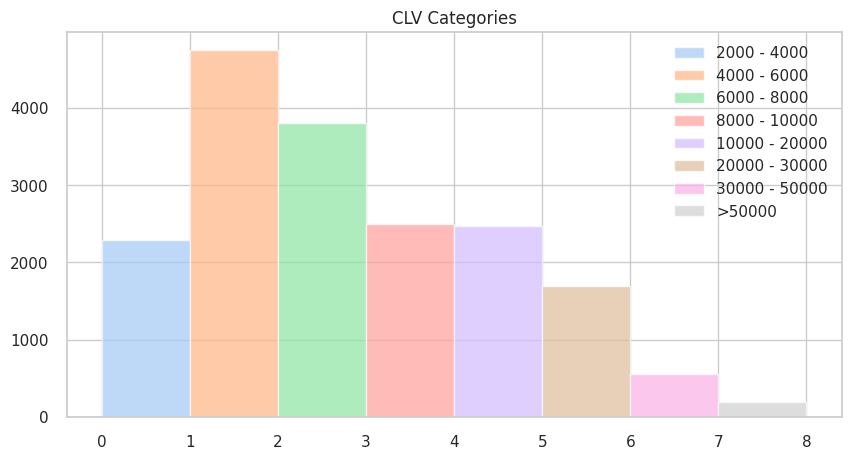

In [164]:
label_clv = ['2000 - 4000', '4000 - 6000', '6000 - 8000', '8000 - 10000', '10000 - 20000', '20000 - 30000', '30000 - 50000', '>50000']
value_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]
CLV_bins = [0,2000, 4000, 6000, 8000, 10000, 20000, 30000, 50000,90000]
for i in range(len(value_labels)-1):
    plt.hist(df['CLV Category'], bins=value_labels[i:i+2], alpha=0.7, label=label_clv[i])
plt.legend()
plt.title("CLV Categories");

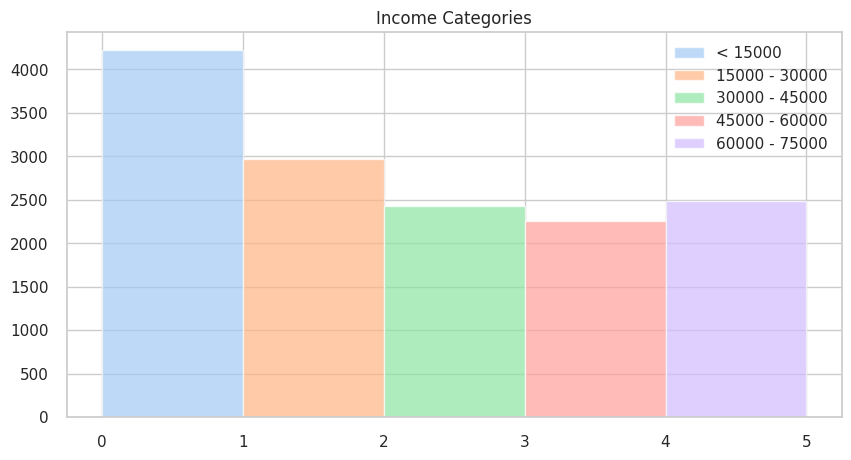

In [165]:
income_labels = [0,1,2,3,4,5]
income_bins = [ -1,15000, 30000, 45000, 60000, 75000, 100000]
labels_income = ['< 15000', '15000 - 30000', '30000 - 45000', '45000 - 60000', '60000 - 75000', '75000 - 100000']
for i in range(len(income_labels)-1):
    plt.hist(df['Income Category'], bins=income_labels[i:i+2], alpha=0.7, label=labels_income[i])
plt.legend()
plt.title("Income Categories");

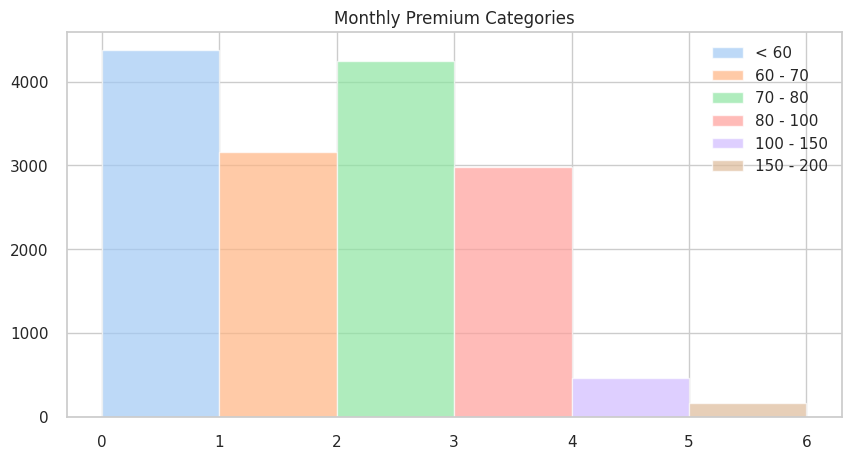

In [166]:
premium_bins = [60, 70, 80, 100, 150, 200, 250, 300]
premium_labels = [0,1,2,3,4,5,6]
labels_premium = ['< 60', '60 - 70', '70 - 80', '80 - 100', '100 - 150', '150 - 200', '200 - 250', '250 - 300']
for i in range(len(premium_labels)-1):
    plt.hist(df['Monthly Premium Category'], bins=premium_labels[i:i+2], alpha=0.7, label=labels_premium[i])
plt.legend()
plt.title("Monthly Premium Categories");

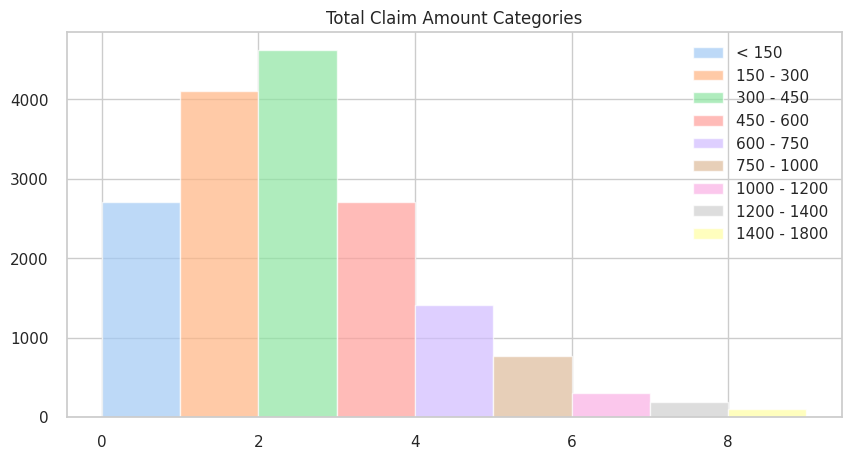

In [167]:
claim_bins = [0, 150, 300, 450, 600, 750, 1000, 1200, 1400, 1800, 3000]
claim_labels = [0,1,2,3,4,5,6,7,8,9]
labels_claim = ['< 150', '150 - 300', '300 - 450', '450 - 600', '600 - 750', '750 - 1000','1000 - 1200', '1200 - 1400', '1400 - 1800', '> 1800']
for i in range(len(claim_labels)-1):
    plt.hist(df['Total Claim Amount Category'], bins=claim_labels[i:i+2], alpha=0.7, label=labels_claim[i])
plt.legend()
plt.title("Total Claim Amount Categories");

##### Encoding the Categorical Variables

In [168]:
df_temp = df[['CLV Category', 'Income Category','Monthly Premium Category','Total Claim Amount Category']]
df_temp.head()

CLV Category Income Category Monthly Premium Category  \
0            1               3                        0   
1            3               0                        2   
2            5               3                        3   
3            3               0                        3   
4            1               2                        1   

  Total Claim Amount Category  
0                           2  
1                           6  
2                           3  
3                           3  
4                           0

In [169]:
df_new = pd.concat([df_categorical_new, df_temp], axis = 1)

In [170]:
categorical = df_new.columns.to_list()
categorical

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'CLV Category',
 'Income Category',
 'Monthly Premium Category',
 'Total Claim Amount Category']

In [171]:
df_encoded = pd.get_dummies(df_new, columns=categorical)
df_encoded.head()

State_Arizona  State_California  State_Nevada  State_Oregon  \
0          False             False         False         False   
1           True             False         False         False   
2          False             False          True         False   
3          False              True         False         False   
4          False             False         False         False   

   State_Washington  Response_No  Response_Yes  Coverage_Basic  \
0              True         True         False            True   
1             False         True         False           False   
2             False         True         False           False   
3             False         True         False            True   
4              True         True         False            True   

   Coverage_Extended  Coverage_Premium  ...  Total Claim Amount Category_0  \
0              False             False  ...                          False   
1               True             False  ...                          False   
2              False              True  ...                          False   
3              False             False  ...                          False   
4              False             False  ...                           True   

   Total Claim Amount Category_1  Total Claim Amount Category_2  \
0                          False                           True   
1                          False                          False   
2                          False                          False   
3                          False                          False   
4                          False                          False   

   Total Claim Amount Category_3  Total Claim Amount Category_4  \
0                          False                          False   
1                          False                          False   
2                           True                          False   
3                           True                          False   
4                          False                          False   

   Total Claim Amount Category_5  Total Claim Amount Category_6  \
0                          False                          False   
1                          False                           True   
2                          False                          False   
3                          False                          False   
4                          False                          False   

   Total Claim Amount Category_7  Total Claim Amount Category_8  \
0                          False                          False   
1                          False                          False   
2                          False                          False   
3                          False                          False   
4                          False                          False   

   Total Claim Amount Category_9  
0                          False  
1                          False  
2                          False  
3                          False  
4                          False  

[5 rows x 89 columns]

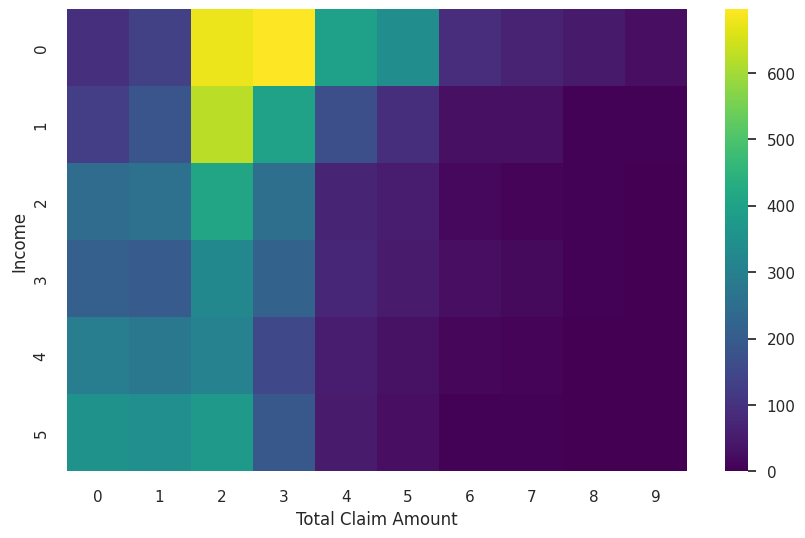

In [172]:
plt.subplots(figsize=(10, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Income Category'].value_counts()
    for x_label, grp in df_new.groupby('Total Claim Amount Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Total Claim Amount')
_ = plt.ylabel('Income')

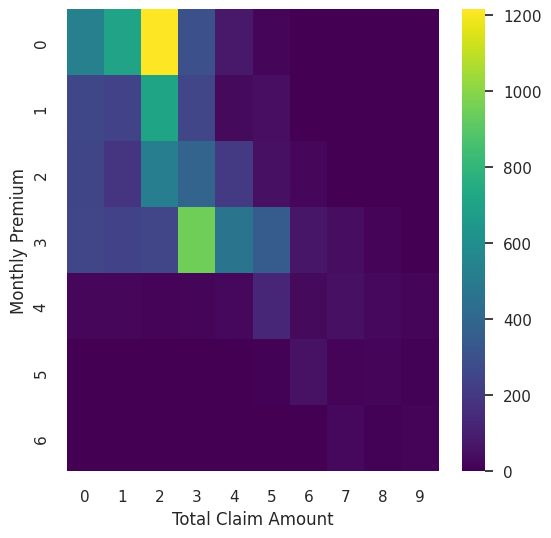

In [173]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Monthly Premium Category'].value_counts()
    for x_label, grp in df_new.groupby('Total Claim Amount Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Total Claim Amount')
_ = plt.ylabel('Monthly Premium')

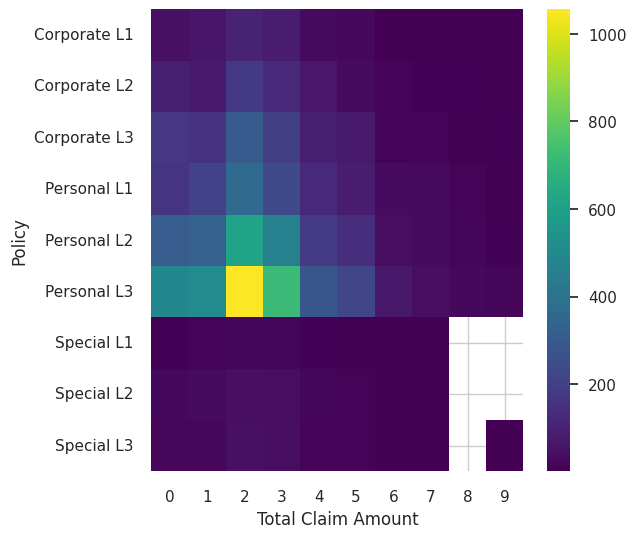

In [174]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Policy'].value_counts()
    for x_label, grp in df_new.groupby('Total Claim Amount Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Total Claim Amount')
_ = plt.ylabel('Policy')

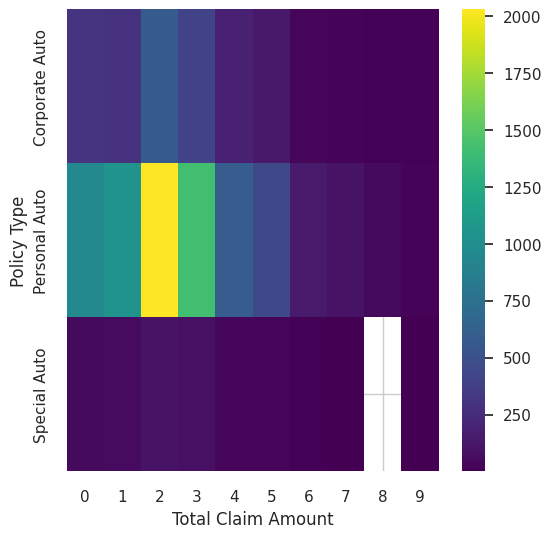

In [175]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Policy Type'].value_counts()
    for x_label, grp in df_new.groupby('Total Claim Amount Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Total Claim Amount')
_ = plt.ylabel('Policy Type')

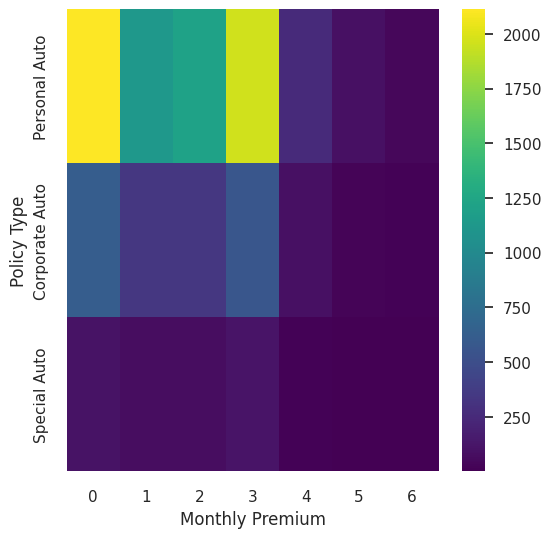

In [176]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Policy Type'].value_counts()
    for x_label, grp in df_new.groupby('Monthly Premium Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Monthly Premium')
_ = plt.ylabel('Policy Type')

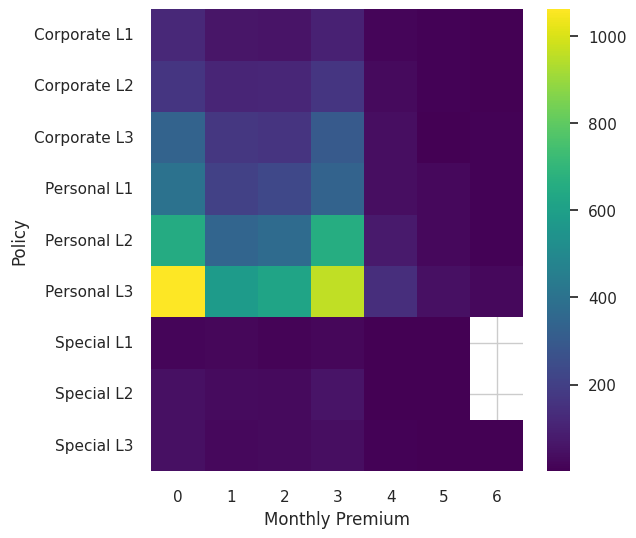

In [177]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Policy'].value_counts()
    for x_label, grp in df_new.groupby('Monthly Premium Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Monthly Premium')
_ = plt.ylabel('Policy')

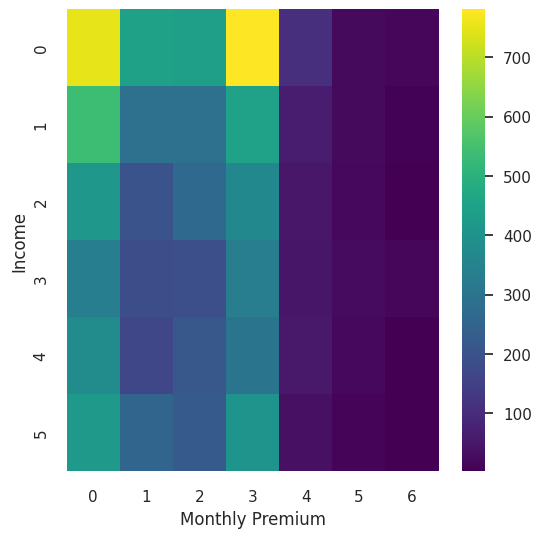

In [178]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Income Category'].value_counts()
    for x_label, grp in df_new.groupby('Monthly Premium Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Monthly Premium')
_ = plt.ylabel('Income')

### PCA

In [179]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [180]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_columns])
pca = PCA()
pca.fit(df_scaled)

PCA()

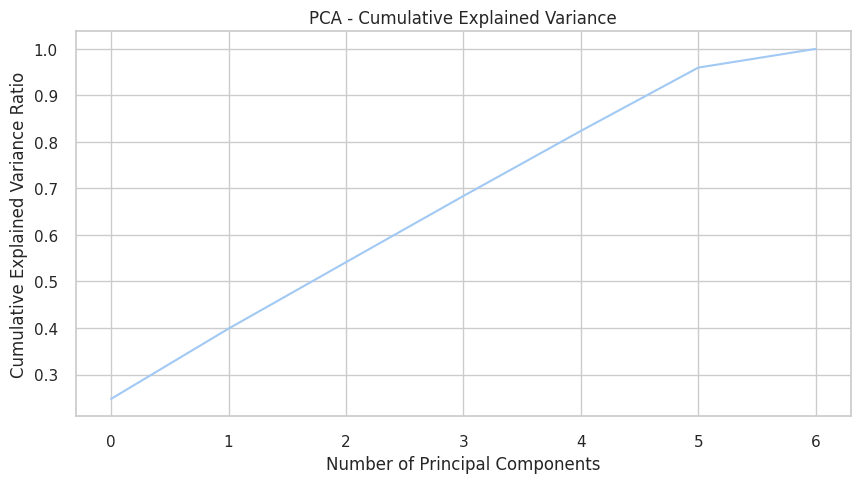

In [181]:
explained_variance_ratio = pca.explained_variance_ratio_

# Visualize cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Explained Variance')
plt.show()

We will consider the number of components = 5 for the PCA of the numerical features.

In [182]:
# Initialize PCA
pca = PCA(n_components=5)

# Fit PCA to the standardized data
pca.fit(df_scaled)

# Transform the data into the new feature space
df_pca = pca.transform(df_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Display the DataFrame with principal components
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5
0 -0.743364 -1.654475 -0.294265 -1.784279  0.276085
1  2.128287 -0.990163 -0.821634  2.017952 -0.053372
2  0.468835 -0.065729 -0.308743 -0.734216  0.420762
3  0.917910 -0.612331 -0.686405  1.708054 -0.468162
4 -1.141628  0.372408 -0.329233 -0.712626 -0.324881


Plotting the 3 Principal Components on a 3D plot

In [183]:
from mpl_toolkits.mplot3d import Axes3D

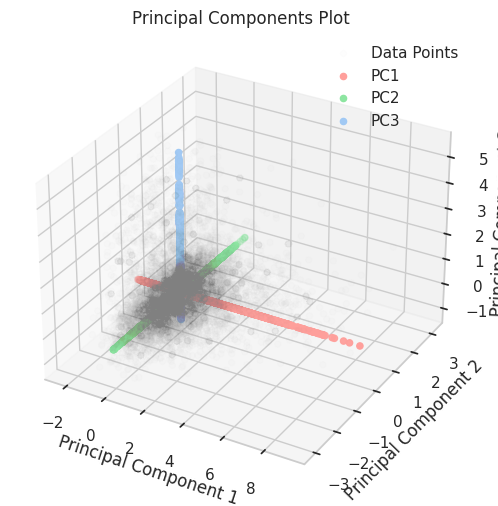

In [184]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
PC1 = df_pca['PC1']
PC2 = df_pca['PC2']
PC3 = df_pca['PC3']
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c='gray', label='Data Points', marker='o', alpha = 0.01)
ax.scatter(PC1, np.zeros_like(PC1), np.zeros_like(PC1), c='r', label='PC1', marker='o')
ax.scatter(np.zeros_like(PC2), PC2, np.zeros_like(PC2), c='g', label='PC2', marker='o')
ax.scatter(np.zeros_like(PC3), np.zeros_like(PC3), PC3, c='b', label='PC3', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Principal Components Plot')
ax.legend()
plt.show()

###  t-distributed Stochastic Neighbor Embedding

In [185]:
df_2 = pd.concat([df[numerical_columns], df_categorical_new], axis = 1)
df_2.head()

Income  Monthly Premium Auto  Months Since Last Claim  \
0   56274                    69                       32   
1       0                    94                       13   
2   48767                   108                       18   
3       0                   106                       18   
4   43836                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies  Total Claim Amount       State Response  Coverage  ...  \
0                   1          384.811147  Washington       No     Basic  ...   
1                   8         1131.464935     Arizona       No  Extended  ...   
2                   2          566.472247      Nevada       No   Premium  ...   
3                   7          529.881344  California       No     Basic  ...   
4                   1          138.130879  Washington       No     Basic  ...   

  EmploymentStatus Gender Location Code Marital Status     Policy Type  \
0         Employed      F      Suburban        Married  Corporate Auto   
1       Unemployed      F      Suburban         Single   Personal Auto   
2         Employed      F      Suburban        Married   Personal Auto   
3       Unemployed      M      Suburban        Married  Corporate Auto   
4         Employed      M         Rural         Single   Personal Auto   

         Policy Renew Offer Type Sales Channel  Vehicle Class Vehicle Size  
0  Corporate L3           Offer1         Agent   Two-Door Car      Medsize  
1   Personal L3           Offer3         Agent  Four-Door Car      Medsize  
2   Personal L3           Offer1         Agent   Two-Door Car      Medsize  
3  Corporate L2           Offer1   Call Center            SUV      Medsize  
4   Personal L1           Offer1         Agent  Four-Door Car      Medsize  

[5 rows x 21 columns]

In [186]:
cat = df_categorical_new.columns.to_list()
df_encode = pd.get_dummies(df_2, columns=cat)
df_encode.head()

Income  Monthly Premium Auto  Months Since Last Claim  \
0   56274                    69                       32   
1       0                    94                       13   
2   48767                   108                       18   
3       0                   106                       18   
4   43836                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies  Total Claim Amount  State_Arizona  State_California  \
0                   1          384.811147          False             False   
1                   8         1131.464935           True             False   
2                   2          566.472247          False             False   
3                   7          529.881344          False              True   
4                   1          138.130879          False             False   

   State_Nevada  ...  Sales Channel_Web  Vehicle Class_Four-Door Car  \
0         False  ...              False                        False   
1         False  ...              False                         True   
2          True  ...              False                        False   
3         False  ...              False                        False   
4         False  ...              False                         True   

   Vehicle Class_Luxury Car  Vehicle Class_Luxury SUV  Vehicle Class_SUV  \
0                     False                     False              False   
1                     False                     False              False   
2                     False                     False              False   
3                     False                     False               True   
4                     False                     False              False   

   Vehicle Class_Sports Car  Vehicle Class_Two-Door Car  Vehicle Size_Large  \
0                     False                        True               False   
1                     False                       False               False   
2                     False                        True               False   
3                     False                       False               False   
4                     False                       False               False   

   Vehicle Size_Medsize  Vehicle Size_Small  
0                  True               False  
1                  True               False  
2                  True               False  
3                  True               False  
4                  True               False  

[5 rows x 64 columns]

In [187]:
df_scaled_new = scaler.fit_transform(df_encode)
len(df_scaled_new[0,])

64

In [188]:
from sklearn.manifold import TSNE

In [189]:
tsne = TSNE(n_components=3, random_state=42)
df_tsne = tsne.fit_transform(df_scaled_new)

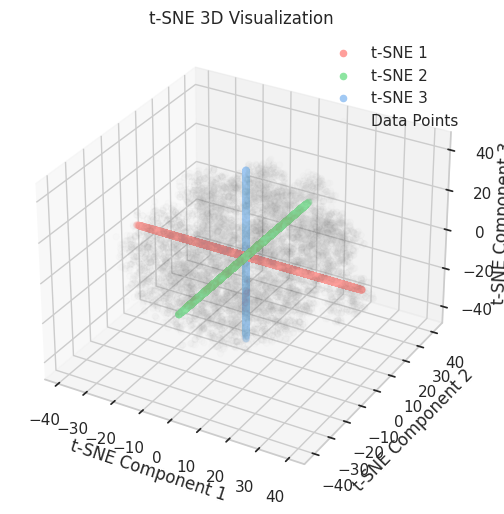

In [190]:
# Visualize the results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
tsne1 = df_tsne[:, 0]
tsne2 = df_tsne[:, 1]
tsne3 = df_tsne[:, 2]
ax.scatter(tsne1, np.zeros_like(tsne1), np.zeros_like(tsne1), c='r', label='t-SNE 1', marker='o')
ax.scatter(np.zeros_like(tsne2), tsne2, np.zeros_like(tsne2), c='g', label='t-SNE 2', marker='o')
ax.scatter(np.zeros_like(tsne3), np.zeros_like(tsne3), tsne3, c='b', label='t-SNE 3', marker='o')
ax.scatter(tsne1, tsne2, tsne3, alpha=0.01, label='Data Points',c = 'gray')
ax.set_title('t-SNE 3D Visualization')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.legend()
plt.show()

#### Clustering Analysis
K-Means Clustering to find customer segmentation

In [191]:
from sklearn.cluster import KMeans

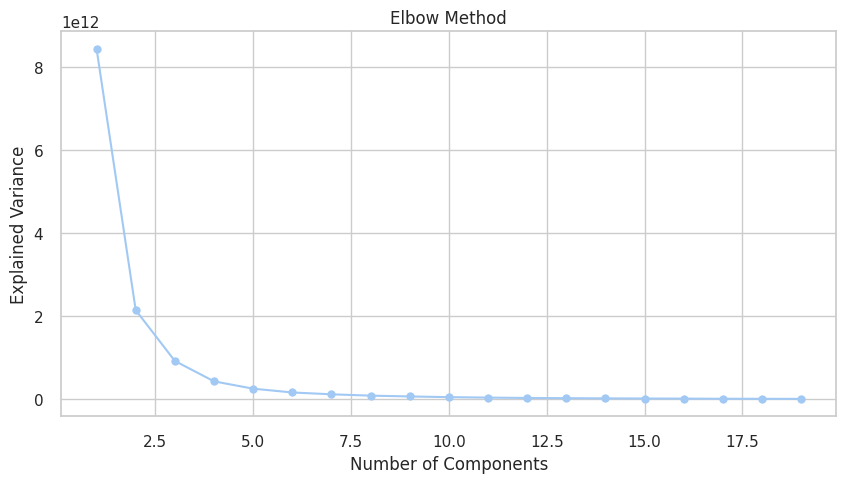

In [192]:
exp_variance = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init = 'auto')
    kmeans.fit(df_encode)
    exp_variance.append(kmeans.inertia_)

plt.plot(range(1, 20), exp_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Method')
plt.show()

In [193]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init = 'auto')
clusters = kmeans.fit_predict(df_scaled_new)

In [194]:
df['Cluster'] = clusters
cluster_centers = kmeans.cluster_centers_

In [195]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(df_tsne, kmeans.labels_)
print("Silhouette Score tNSE:", sil_score)

Silhouette Score tNSE: -0.05486753


In [196]:
df_pca_new = np.array(df_pca)

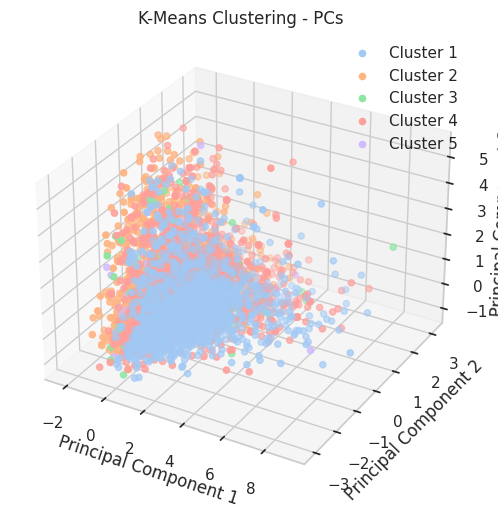

In [197]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(5):
    ax.scatter(df_pca_new[clusters == cluster, 0],
               df_pca_new[clusters == cluster, 1],
               df_pca_new[clusters == cluster, 2],
               label=f'Cluster {cluster+1}')

ax.set_title('K-Means Clustering - PCs')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

In [198]:
sil_score = silhouette_score(df_tsne, kmeans.labels_)
print("Silhouette Score PCA:", sil_score)

Silhouette Score PCA: -0.05486753


#### Customer Segmentation

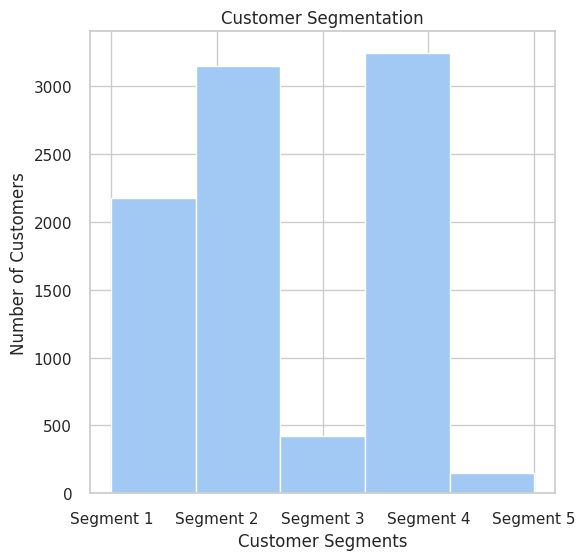

In [199]:
plt.figure(figsize = (6,6))
labels = ["Segment 1", "Segment 2", "Segment 3","Segment 4", "Segment 5"]
plt.hist(df['Cluster'], bins = 5, label = labels)
#bins = 3
plt.xticks(ticks = [0,1,2,3,4],labels = labels)
plt.title("Customer Segmentation")
plt.xlabel("Customer Segments")
plt.ylabel("Number of Customers")
plt.show()

#### Feature Importance Analysis
1. Recursive Feature Elimination (RFE)

In [200]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [201]:
rf = RandomForestRegressor()
rfe = RFE(estimator=rf, n_features_to_select=10)
rfe.fit(df_encode, df['Customer Lifetime Value'])

RFE(estimator=RandomForestRegressor(), n_features_to_select=10)

In [202]:
# Get the selected features
selected_features_rfe = df_encode.columns[rfe.support_]
print("Selected features using RFE:")
print(selected_features_rfe)

Selected features using RFE:
Index(['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount', 'Gender_F',
       'Renew Offer Type_Offer2', 'Sales Channel_Agent'],
      dtype='object')


2. Feature Importance Using Random Forest

In [203]:
# Fit the Random Forest model to the data
rf.fit(df_encode, df['Customer Lifetime Value'])
feature_importances = rf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]
# Get the names of the top features
top_features_rf = df_encode.columns[indices]
print("Top features and their importances using Random Forest:")
for i in range(len(top_features_rf)):
    print(f"{top_features_rf[i]}: {feature_importances[indices[i]]}")

Top features and their importances using Random Forest:
Number of Policies: 0.47011639281708173
Monthly Premium Auto: 0.24584607223437727
Months Since Last Claim: 0.03862184566727768
Total Claim Amount: 0.035682241260884866
Months Since Policy Inception: 0.034442204896846164
Income: 0.028515523490626412
Number of Open Complaints: 0.006084702578297017
Education_High School or Below: 0.004473005827626246
Sales Channel_Branch: 0.004422584272280602
Sales Channel_Agent: 0.00422268956510767
Marital Status_Married: 0.004204210262316497
Renew Offer Type_Offer2: 0.004190234242141047
Policy_Personal L3: 0.003935190576559359
Education_Bachelor: 0.0037914605768284973
Renew Offer Type_Offer4: 0.003774439408071959
Sales Channel_Call Center: 0.003691730338772702
Policy_Personal L2: 0.003643388760855357
Coverage_Basic: 0.003595030084079474
Education_College: 0.0035861736445581363
State_Washington: 0.003320588292976846
Marital Status_Single: 0.003191387849864221
Renew Offer Type_Offer1: 0.0031817697959

In [204]:
rf = RandomForestRegressor()
# Fit the Random Forest model to the data
rf.fit(df_encode, df['Customer Lifetime Value'])
feature_importances = rf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]
# Get the names of the top features
top_features_rf = df_encode.columns[indices]
print("Top features using Random Forest:")
for i in range(1,11):
    print(top_features_rf[i])

Top features using Random Forest:
Monthly Premium Auto
Months Since Last Claim
Total Claim Amount
Months Since Policy Inception
Income
Number of Open Complaints
Sales Channel_Branch
Education_High School or Below
Education_Bachelor
Renew Offer Type_Offer2


#### testing with pycaret

In [205]:
# !pip install pycaret

In [206]:
dfPycaret = df.drop(['Customer', 'Effective To Date'], axis=1)

In [207]:
data = dfPycaret.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dfPycaret.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (8221, 27)
Unseen Data For Predictions: (913, 27)


In [208]:
from pycaret.regression import *

In [209]:
exp_reg101 = setup(data = data, target = 'Customer Lifetime Value', feature_selection=True, session_id=123)

In [210]:
compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=123)

In [89]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [211]:
gbr = create_model('gbr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [212]:
gbr.feature_importances_

array([0.01402397, 0.29506968, 0.01678211, 0.65714538, 0.01697886])

In [213]:
tuned_gb = tune_model(gbr, fold = 5)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


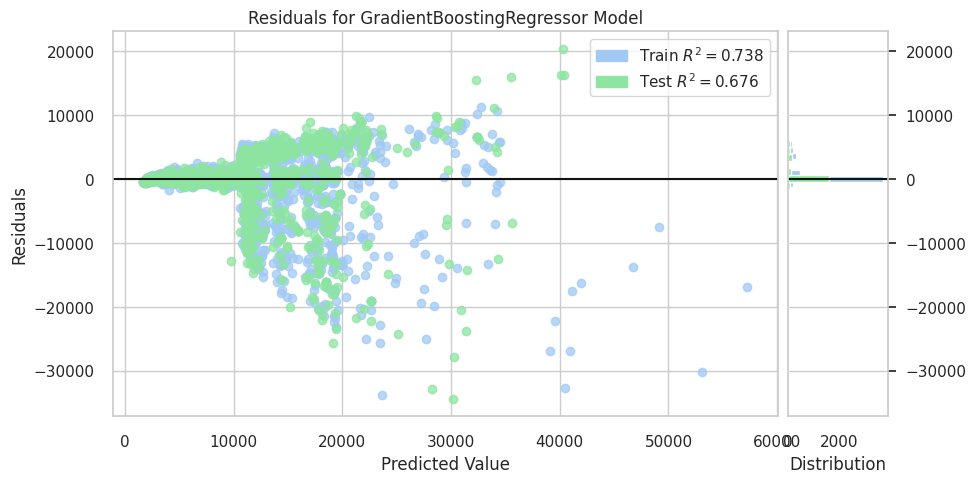

In [214]:
plot_model(tuned_gb)

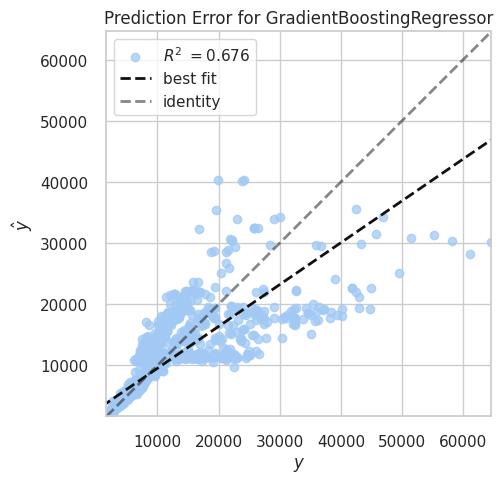

In [215]:
# prediction error plot
plot_model(tuned_gb, plot = 'error')

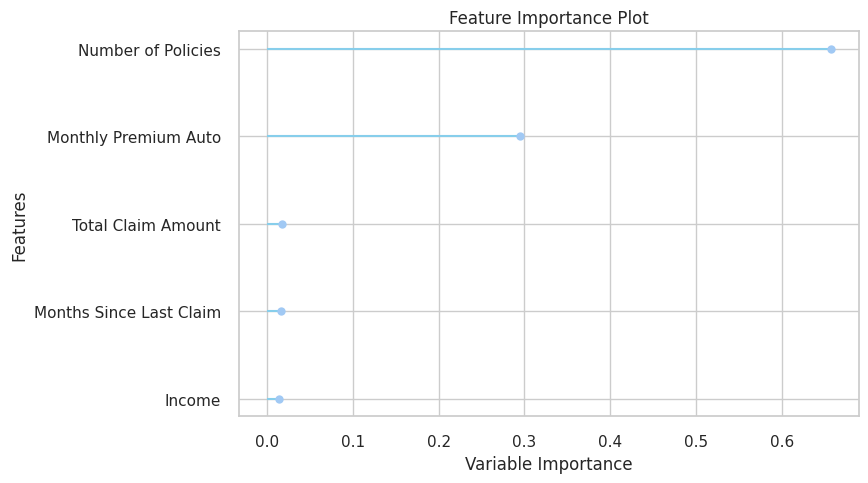

In [216]:
plot_model(tuned_gb, plot='feature')

In [217]:
unseen_predictions = predict_model(tuned_gb, data=data_unseen)
unseen_predictions.head()

State Response  Coverage             Education EmploymentStatus  \
0     Arizona       No     Basic  High School or Below       Unemployed   
1  Washington       No     Basic  High School or Below       Unemployed   
2      Oregon       No     Basic  High School or Below       Unemployed   
3      Nevada       No     Basic               College         Employed   
4      Oregon       No  Extended  High School or Below         Employed   

  Gender  Income Location Code Marital Status  Monthly Premium Auto  ...  \
0      F       0      Suburban       Divorced                   119  ...   
1      M       0      Suburban         Single                   194  ...   
2      F       0         Urban        Married                    68  ...   
3      M   21927         Rural        Married                    71  ...   
4      F   69096         Rural        Married                    99  ...   

   Total Claim Amount  Vehicle Class  Vehicle Size  CLV Category  \
0          729.405762            SUV         Large             4   
1         1396.800049     Luxury Car       Medsize             5   
2          256.916290  Four-Door Car       Medsize             5   
3          128.624786  Four-Door Car       Medsize             6   
4           64.669518  Four-Door Car       Medsize             5   

  Income Category Monthly Premium Category Total Claim Amount Category  \
0               0                        3                           4   
1               0                        4                           7   
2               0                        0                           1   
3               1                        1                           0   
4               4                        2                           0   

  Cluster  Customer Lifetime Value prediction_label  
0       0              8129.511230      8028.482276  
1       0             13272.227539     13841.279496  
2       0             17817.464844     11003.731479  
3       1             25002.019531     12038.130099  
4       1             19955.257812     16879.402895  

[5 rows x 28 columns]

It did not give good results

#### model fitting

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [219]:
print(top_features_rf[:11])

Index(['Number of Policies', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Total Claim Amount', 'Months Since Policy Inception', 'Income',
       'Number of Open Complaints', 'Sales Channel_Branch',
       'Education_High School or Below', 'Education_Bachelor',
       'Renew Offer Type_Offer2'],
      dtype='object')


In [220]:
scaling = MinMaxScaler()

In [221]:
X = df_encode[top_features_rf[:11]]
y = df['Customer Lifetime Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
rf = RandomForestRegressor(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)
print('Random Forest regressor')
y_pred = rf.predict(X_test)

print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred) )
print('R-Squared:', r2_score(y_test, y_pred))

Random Forest regressor
RMSE: 4192.1123589843555
MAE: 1500.2292713908594
R-Squared: 0.6590003798450423


The error is high, still needs improvement

In [223]:
df_cat = df.select_dtypes(include=['object'])
df_num = df.select_dtypes(include=['number'])

In [224]:
df_cat

Customer       State Response  Coverage Education EmploymentStatus  \
0     BU79786  Washington       No     Basic  Bachelor         Employed   
1     QZ44356     Arizona       No  Extended  Bachelor       Unemployed   
2     AI49188      Nevada       No   Premium  Bachelor         Employed   
3     WW63253  California       No     Basic  Bachelor       Unemployed   
4     HB64268  Washington       No     Basic  Bachelor         Employed   
...       ...         ...      ...       ...       ...              ...   
9129  LA72316  California       No     Basic  Bachelor         Employed   
9130  PK87824  California      Yes  Extended   College         Employed   
9131  TD14365  California       No  Extended  Bachelor       Unemployed   
9132  UP19263  California       No  Extended   College         Employed   
9133  Y167826  California       No  Extended   College       Unemployed   

     Gender Location Code Marital Status     Policy Type        Policy  \
0         F      Suburban        Married  Corporate Auto  Corporate L3   
1         F      Suburban         Single   Personal Auto   Personal L3   
2         F      Suburban        Married   Personal Auto   Personal L3   
3         M      Suburban        Married  Corporate Auto  Corporate L2   
4         M         Rural         Single   Personal Auto   Personal L1   
...     ...           ...            ...             ...           ...   
9129      M         Urban        Married   Personal Auto   Personal L1   
9130      F      Suburban       Divorced  Corporate Auto  Corporate L3   
9131      M      Suburban         Single  Corporate Auto  Corporate L2   
9132      M      Suburban        Married   Personal Auto   Personal L2   
9133      M      Suburban         Single  Corporate Auto  Corporate L3   

     Renew Offer Type Sales Channel  Vehicle Class Vehicle Size  
0              Offer1         Agent   Two-Door Car      Medsize  
1              Offer3         Agent  Four-Door Car      Medsize  
2              Offer1         Agent   Two-Door Car      Medsize  
3              Offer1   Call Center            SUV      Medsize  
4              Offer1         Agent  Four-Door Car      Medsize  
...               ...           ...            ...          ...  
9129           Offer2           Web  Four-Door Car      Medsize  
9130           Offer1        Branch  Four-Door Car      Medsize  
9131           Offer1        Branch  Four-Door Car      Medsize  
9132           Offer3        Branch  Four-Door Car        Large  
9133           Offer4   Call Center   Two-Door Car      Medsize  

[9134 rows x 15 columns]

In [225]:
df_num

Customer Lifetime Value  Income  Monthly Premium Auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      Months Since Last Claim  Months Since Policy Inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      Number of Open Complaints  Number of Policies  Total Claim Amount  \
0                             0                   1          384.811147   
1                             0                   8         1131.464935   
2                             0                   2          566.472247   
3                             0                   7          529.881344   
4                             0                   1          138.130879   
...                         ...                 ...                 ...   
9129                          0                   2          198.234764   
9130                          0                   1          379.200000   
9131                          3                   2          790.784983   
9132                          0                   3          691.200000   
9133                          0                   1          369.600000   

      Cluster  
0           3  
1           0  
2           3  
3           0  
4           1  
...       ...  
9129        1  
9130        3  
9131        0  
9132        3  
9133        0  

[9134 rows x 9 columns]

In [226]:
from sklearn.preprocessing import LabelEncoder

In [227]:
df_cat.drop(['Customer'],axis=1,inplace=True)

In [228]:
df_cat.columns

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [229]:
for col in df_cat:
  le = LabelEncoder()
  le.fit(df_cat[col])
  df_cat[col] =le.transform(df_cat[col])
df_cat.head()

State  Response  Coverage  Education  EmploymentStatus  Gender  \
0      4         0         0          0                 1       0   
1      0         0         1          0                 4       0   
2      2         0         2          0                 1       0   
3      1         0         0          0                 4       1   
4      4         0         0          0                 1       1   

   Location Code  Marital Status  Policy Type  Policy  Renew Offer Type  \
0              1               1            0       2                 0   
1              1               2            1       5                 2   
2              1               1            1       5                 0   
3              1               1            0       1                 0   
4              0               2            1       3                 0   

   Sales Channel  Vehicle Class  Vehicle Size  
0              0              5             1  
1              0              0             1  
2              0              5             1  
3              2              3             1  
4              0              0             1

In [230]:
df_final =pd.concat([df_num,df_cat],axis=1)
df_final.head()

Customer Lifetime Value  Income  Monthly Premium Auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   Months Since Last Claim  Months Since Policy Inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   Number of Open Complaints  Number of Policies  Total Claim Amount  Cluster  \
0                          0                   1          384.811147        3   
1                          0                   8         1131.464935        0   
2                          0                   2          566.472247        3   
3                          0                   7          529.881344        0   
4                          0                   1          138.130879        1   

   State  ...  EmploymentStatus  Gender  Location Code  Marital Status  \
0      4  ...                 1       0              1               1   
1      0  ...                 4       0              1               2   
2      2  ...                 1       0              1               1   
3      1  ...                 4       1              1               1   
4      4  ...                 1       1              0               2   

   Policy Type  Policy  Renew Offer Type  Sales Channel  Vehicle Class  \
0            0       2                 0              0              5   
1            1       5                 2              0              0   
2            1       5                 0              0              5   
3            0       1                 0              2              3   
4            1       3                 0              0              0   

   Vehicle Size  
0             1  
1             1  
2             1  
3             1  
4             1  

[5 rows x 23 columns]

In [231]:
X =df_final.drop(['Customer Lifetime Value', 'Cluster'],axis=1)
y = df_final['Customer Lifetime Value']
y= np.log(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

#### Random Forest Regressor

In [232]:
rf = RandomForestRegressor(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)
print('Random Forest regressor')
y_pred = rf.predict(X_test)

print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred) )
print('R-Squared:', r2_score(y_test, y_pred))

Random Forest regressor
RMSE: 0.20887488636377521
MAE: 0.09439348560346972
R-Squared: 0.9024289149008369


In [233]:
print(f'R^2 score for train: {rf.score(X_train, y_train)}')
print(f'R^2 score for test: {rf.score(X_test, y_test)}')

R^2 score for train: 0.9828520417345673
R^2 score for test: 0.9024289149008369


In [234]:
y_test_df = pd.DataFrame(y_test, columns=['Customer Lifetime Value'])

In [235]:
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted_Customer_Lifetime_Value'])

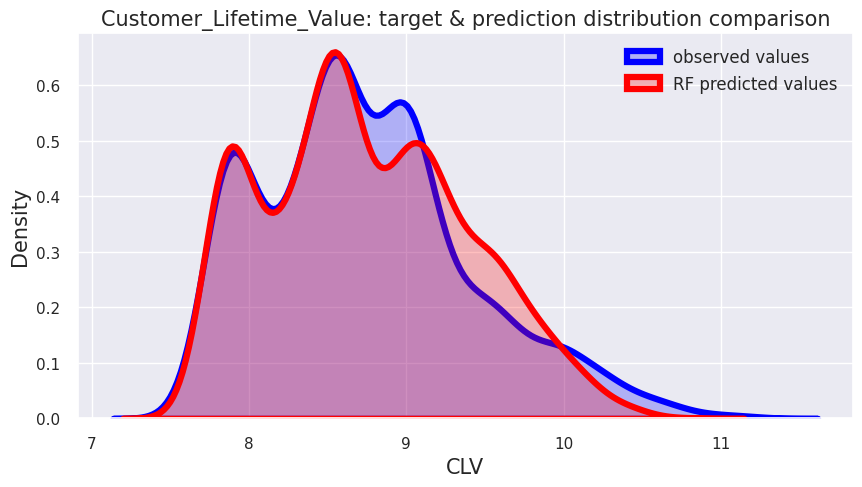

In [236]:
# Plot results
sns.set( rc = {'figure.figsize': (10, 5)})
fig,ax = plt.subplots(1, 1)
sns.kdeplot(x=y_test_df['Customer Lifetime Value'], fill=True, linewidth=4.5, color="blue",label="observed values",)
sns.kdeplot(x=y_pred_df['Predicted_Customer_Lifetime_Value'], fill=True, linewidth=4.5, color="red",label='RF predicted values')
plt.title('Customer_Lifetime_Value: target & prediction distribution comparison', fontsize=15)
plt.xlabel('CLV', fontsize=15)
plt.ylabel('Density', fontsize=15)
ax.legend(fontsize=12)
plt.show()

#### Gradient Boosting Regressor

In [237]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [238]:
gb = GradientBoostingRegressor(n_estimators=35, random_state=1)
tscv = TimeSeriesSplit(n_splits=7)
gbModel = GridSearchCV(gb,param_grid={}, cv=tscv)
gbModel.fit(X_train, y_train)
print('Gradient Boosting regressor')
y_pred_gb = gbModel.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print('MAE:', mean_absolute_error(y_test, y_pred_gb) )
print('R-Squared:', r2_score(y_test, y_pred_gb))
y_pred_gb_df = pd.DataFrame(y_pred_gb, columns=['Predicted_Customer_Lifetime_Value'])

Gradient Boosting regressor
RMSE: 0.2188187969962961
MAE: 0.11728000534185512
R-Squared: 0.8929176400821978


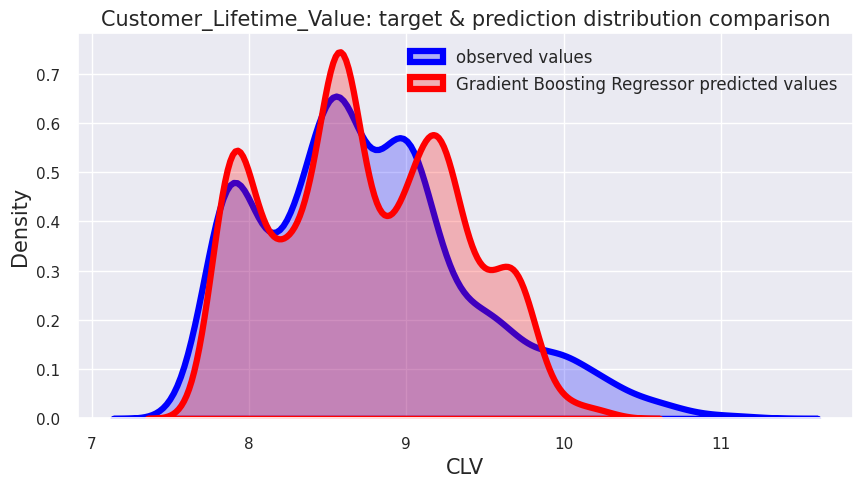

In [239]:
# Plot results
sns.set( rc = {'figure.figsize': (10, 5)})
fig,ax = plt.subplots(1, 1)
sns.kdeplot(x=y_test_df['Customer Lifetime Value'], fill=True, linewidth=4.5, color="blue",label="observed values",)
sns.kdeplot(x=y_pred_gb_df['Predicted_Customer_Lifetime_Value'], fill=True, linewidth=4.5, color="red",label='Gradient Boosting Regressor predicted values')
plt.title('Customer_Lifetime_Value: target & prediction distribution comparison', fontsize=15)
plt.xlabel('CLV', fontsize=15)
plt.ylabel('Density', fontsize=15)
ax.legend(fontsize=12)
plt.show()

#### Understanding models with shap

1. RF

In [240]:
!pip install shap

In [241]:
import shap

In [242]:
explainer = shap.Explainer(rf)
shap_values_rf = explainer.shap_values(X_test)

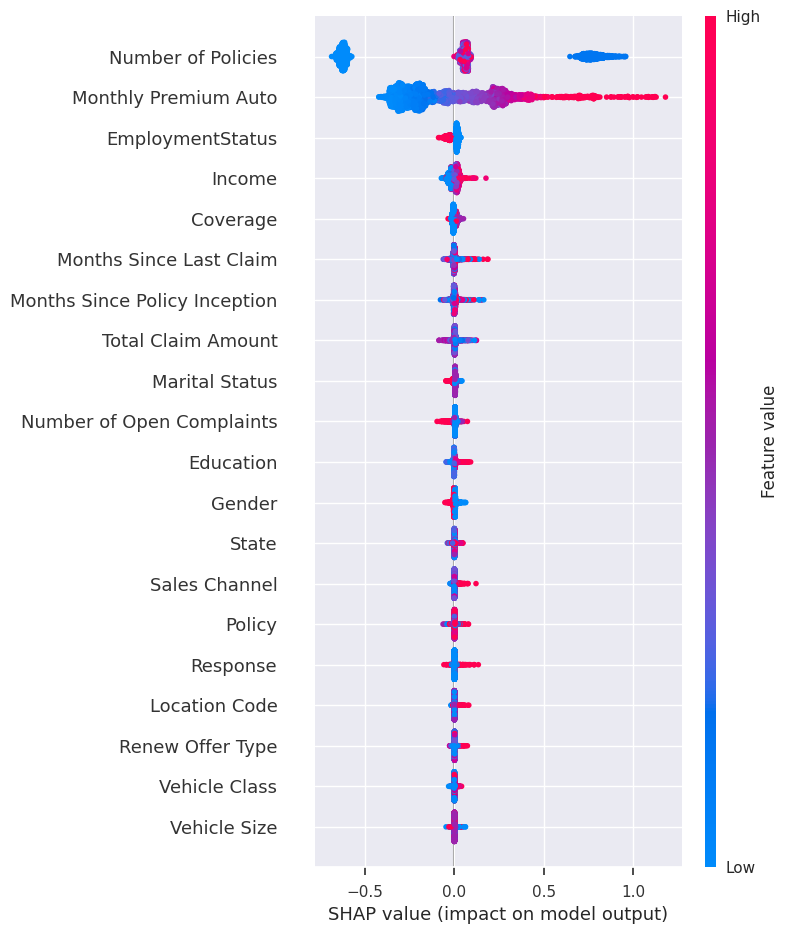

In [243]:
shap.summary_plot(shap_values_rf, X_test)

2. GB